In [1]:
p <- c("vegan","ade4","reshape2","ggplot2","pheatmap","dplyr","randomForest", 
       "cluster", "clusterSim", "plotly", "cowplot", "pROC", "corrplot")
usePackage <- function(p) {
  if (!is.element(p, installed.packages()[,1]))
    install.packages(p, dep=TRUE, repos="https://cloud.r-project.org/")
  suppressWarnings(suppressMessages(invisible(require(p, character.only=TRUE))))
}
invisible(lapply(p, usePackage))


also installing the dependencies ‘e1071’, ‘rgl’

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [2]:
outpath="./"

## Data input

In [3]:
data<-read.table("all_datasets_runtime_rmse_paramspace_11with_defaults.csv", sep=",", header=TRUE)
head(data)

DATASET    n_samples n_features NAME         SIZE_PARAM_SPACE
1 soil_10082 221       20479      RandomForest 8580            
2 soil_10082 221       20479      RandomForest 8580            
3 soil_10082 221       20479      RandomForest 8580            
4 soil_10082 221       20479      RandomForest 8580            
5 soil_10082 221       20479      RandomForest 8580            
6 soil_10082 221       20479      RandomForest 8580            
  PARAM                                                                                                                                                                                                                      
1 {'max_features': 'log2', 'min_samples_split': 0.01, 'bootstrap': False, 'min_samples_leaf': 0.01, 'random_state': 2018, 'criterion': 'mse', 'n_estimators': 1000, 'n_jobs': -1, 'max_depth': 44}                           
2 {'max_features': 27, 'min_samples_split': 0.81, 'bootstrap': True, 'min_samples_leaf': 0.31000000000000005, 'random_state': 2018, 'criterion': 'mse', 'n_estimators': 1000, 'n_jobs': -1, 'max_depth': 15}                 
3 {'max_features': 82, 'min_samples_split': 0.81, 'bootstrap': True, 'min_samples_leaf': 0.21000000000000002, 'random_state': 2018, 'criterion': 'mse', 'n_estimators': 1000, 'n_jobs': -1, 'max_depth': 44}                 
4 {'max_features': 2255, 'min_samples_split': 0.01, 'bootstrap': False, 'min_samples_leaf': 0.21000000000000002, 'random_state': 2018, 'criterion': 'mse', 'n_estimators': 1000, 'n_jobs': -1, 'max_depth': 25}              
5 {'max_features': 2255, 'min_samples_split': 0.21000000000000002, 'bootstrap': False, 'min_samples_leaf': 0.41000000000000003, 'random_state': 2018, 'criterion': 'mse', 'n_estimators': 1000, 'n_jobs': -1, 'max_depth': 3}
6 {'max_features': 248, 'min_samples_split': 0.01, 'bootstrap': True, 'min_samples_leaf': 0.31000000000000005, 'random_state': 2018, 'criterion': 'mse', 'n_estimators': 1000, 'n_jobs': -1, 'max_depth': 5}                 
  RUNTIME  RMSE      X.RMSE   relative_RMSE IS_DEFAULT
1 25.24643 0.2635134 43.18519  39.61118     False     
2 19.41094 0.4311767 70.66224 128.44035     False     
3 19.23767 0.4311767 70.66224 128.44035     False     
4 65.18556 0.2885484 47.28797  52.87488     False     
5 33.41459 0.3422609 56.09051  81.33216     False     
6 20.88176 0.4088788 67.00799 116.62673     False

In [4]:
cat("The # of datasets: ", nlevels(data$DATASET))

The # of datasets:  20

In [5]:
levels(data$DATASET)

[1] "82-soil"                "cider"                  "fermentation_10119"    
 [4] "fermentation_1976_beer" "fermentation_1976_wine" "fermentation_2278"     
 [7] "infant_fecal_10080"     "infant_fecal_10918"     "infant_fecal_11358"    
[10] "infant_fecal_11402"     "infant_oral_2010"       "infant_skin_2010"      
[13] "malnutrition"           "PMI_16s"                "soil_10082"            
[16] "soil_10442"             "soil_10764"             "soil_1883"             
[19] "soil_2104"              "soil_945"

In [6]:
cat("The # of methods: ", nlevels(data$NAME))

The # of methods:  36

In [7]:
levels(data$NAME)

[1] "aitchison"                   "braycurtis"                 
 [3] "canberra"                    "chebyshev"                  
 [5] "cityblock"                   "correlation"                
 [7] "cosine"                      "DecisionTree"               
 [9] "dice"                        "ElasticNet"                 
[11] "euclidean"                   "ExtraTrees"                 
[13] "generalized_unifrac"         "GradientBoosting"           
[15] "hamming"                     "jaccard"                    
[17] "jensenshannon"               "kulsinski"                  
[19] "Lasso"                       "LinearSVR"                  
[21] "matching"                    "MLPRegressor"               
[23] "RadialSVR"                   "RandomForest"               
[25] "Ridge"                       "rogerstanimoto"             
[27] "russellrao"                  "SigmoidSVR"                 
[29] "sokalmichener"               "sokalsneath"                
[31] "sqeuclidean"                 "unweighted_unifrac"         
[33] "weighted_normalized_unifrac" "weighted_unifrac"           
[35] "XGBRegressor"                "yule"

## Add method family dict

In [9]:
family<-read.table("family_dict.txt", sep="\t", header=TRUE)
data<-merge(family, data, by="NAME")
head(data)

NAME      Family   DATASET            n_samples n_features SIZE_PARAM_SPACE
1 aitchison KNN_dist infant_fecal_11358 106       1708       20              
2 aitchison KNN_dist infant_fecal_11358 106       1708       20              
3 aitchison KNN_dist infant_fecal_10918 172        731       20              
4 aitchison KNN_dist fermentation_2278  110        281       20              
5 aitchison KNN_dist infant_fecal_11358 106       1708       20              
6 aitchison KNN_dist infant_fecal_10918 172        731       20              
  PARAM                                                                                                          
1 {'p': 2, 'n_neighbors': 1, 'weights': 'distance', 'algorithm': 'brute', 'n_jobs': -1, 'metric': 'precomputed'} 
2 {'p': 2, 'n_neighbors': 41, 'weights': 'distance', 'algorithm': 'brute', 'n_jobs': -1, 'metric': 'precomputed'}
3 {'p': 2, 'n_neighbors': 8, 'weights': 'distance', 'algorithm': 'brute', 'n_jobs': -1, 'metric': 'precomputed'} 
4 {'p': 2, 'n_neighbors': 4, 'weights': 'uniform', 'algorithm': 'brute', 'n_jobs': -1, 'metric': 'precomputed'}  
5 {'p': 2, 'n_neighbors': 2, 'weights': 'distance', 'algorithm': 'brute', 'n_jobs': -1, 'metric': 'precomputed'} 
6 {'p': 2, 'n_neighbors': 102, 'weights': 'uniform', 'algorithm': 'brute', 'n_jobs': -1, 'metric': 'precomputed'}
  RUNTIME    RMSE       X.RMSE    relative_RMSE IS_DEFAULT
1 0.06905302  1.3180440  86.57417  49.31762     False     
2 0.04455400  1.0180768  66.87118  15.33516     False     
3 0.08538492  0.3058028 117.95333 137.79463     False     
4 0.04311471 17.7793673  43.40878  16.24827     True      
5 0.06890022  1.1695102  76.81791  32.49063     False     
6 0.05968699  0.3058028 117.95333 137.79463     False

### Normalize the algorithm name

In [10]:
levels(data$NAME)
levels(data$NAME)<-c('Aitchison distance', 'Bray-Curtis dissimilarity', 'Canberra distance', 'Chebyshev distance', 'City-block distance', 'Correlation coefficient', 'Cosine similarity', 'DecisionTree', 'Dice measures', 'ElasticNet', 'Euclidean distance', 'ExtraTrees', 'Generalized UniFrac', 'GradientBoosting', 'Hamming distance', 'Jaccard similarity index', 'Jensen-Shannon divergence', 'Kulczynski dissimilarity index', 'Lasso', 'LinearSVR', 'Matching component', 'Multilayer Perceptron Regressor', 'RadialSVR', 'RandomForest', 'Ridge', 'Rogers-Tanimoto distance', 'Russell-Rao coefficient', 'SigmoidSVR', 'Sokal-Michener coefficient', 'Sokal-Sneath index', 'Squared Euclidean distance', 'Unweighted UniFrac', 'Weighted normalized UniFrac', 'Weighted UniFrac', 'XGBRegressor', 'Yule index')
#c('Aitchison', 'braycurtis', 'canberra', 'chebyshev', 'cityblock', 'correlation', 'cosine', 'DecisionTree', 'dice', 'ElasticNet', 'euclidean', 'ExtraTrees', 'generalized_unifrac', 'GradientBoosting', 'hamming', 'jaccard', 'jensenshannon', 'kulsinski', 'Lasso', 'LinearSVR', 'matching', 'MLPRegressor', 'RadialSVR', 'RandomForest', 'Ridge', 'rogerstanimoto', 'russellrao', 'SigmoidSVR', 'sokalmichener', 'sokalsneath', 'sqeuclidean', 'unweighted_unifrac', 'weighted_normalized_unifrac', 'weighted_unifrac', 'XGBRegressor', 'yule')
levels(data$NAME)


[1] "aitchison"                   "braycurtis"                 
 [3] "canberra"                    "chebyshev"                  
 [5] "cityblock"                   "correlation"                
 [7] "cosine"                      "DecisionTree"               
 [9] "dice"                        "ElasticNet"                 
[11] "euclidean"                   "ExtraTrees"                 
[13] "generalized_unifrac"         "GradientBoosting"           
[15] "hamming"                     "jaccard"                    
[17] "jensenshannon"               "kulsinski"                  
[19] "Lasso"                       "LinearSVR"                  
[21] "matching"                    "MLPRegressor"               
[23] "RadialSVR"                   "RandomForest"               
[25] "Ridge"                       "rogerstanimoto"             
[27] "russellrao"                  "SigmoidSVR"                 
[29] "sokalmichener"               "sokalsneath"                
[31] "sqeuclidean"                 "unweighted_unifrac"         
[33] "weighted_normalized_unifrac" "weighted_unifrac"           
[35] "XGBRegressor"                "yule"

[1] "Aitchison distance"              "Bray-Curtis dissimilarity"      
 [3] "Canberra distance"               "Chebyshev distance"             
 [5] "City-block distance"             "Correlation coefficient"        
 [7] "Cosine similarity"               "DecisionTree"                   
 [9] "Dice measures"                   "ElasticNet"                     
[11] "Euclidean distance"              "ExtraTrees"                     
[13] "Generalized UniFrac"             "GradientBoosting"               
[15] "Hamming distance"                "Jaccard similarity index"       
[17] "Jensen-Shannon divergence"       "Kulczynski dissimilarity index" 
[19] "Lasso"                           "LinearSVR"                      
[21] "Matching component"              "Multilayer Perceptron Regressor"
[23] "RadialSVR"                       "RandomForest"                   
[25] "Ridge"                           "Rogers-Tanimoto distance"       
[27] "Russell-Rao coefficient"         "SigmoidSVR"                     
[29] "Sokal-Michener coefficient"      "Sokal-Sneath index"             
[31] "Squared Euclidean distance"      "Unweighted UniFrac"             
[33] "Weighted normalized UniFrac"     "Weighted UniFrac"               
[35] "XGBRegressor"                    "Yule index"

## Add datasize dict

In [11]:
datasize<-read.table("DATASET_dict.txt", sep="\t", header=TRUE)
data<-merge(datasize, data, by="DATASET")
head(data)

DATASET Num_Samples Num_Features Datasize Density  Datatype  NAME      Family
1 82-soil 74          21203        1569022  5.889534 non_human RadialSVR SVM   
2 82-soil 74          21203        1569022  5.889534 non_human RadialSVR SVM   
3 82-soil 74          21203        1569022  5.889534 non_human RadialSVR SVM   
4 82-soil 74          21203        1569022  5.889534 non_human RadialSVR SVM   
5 82-soil 74          21203        1569022  5.889534 non_human RadialSVR SVM   
6 82-soil 74          21203        1569022  5.889534 non_human RadialSVR SVM   
  n_samples n_features SIZE_PARAM_SPACE
1 74        21203      1760            
2 74        21203      1760            
3 74        21203      1760            
4 74        21203      1760            
5 74        21203      1760            
6 74        21203      1760            
  PARAM                                                                          
1 {'C': 100000.0, 'epsilon': 0.01, 'kernel': 'rbf', 'coef0': 10, 'gamma': 'auto'}
2 {'C': 100000.0, 'epsilon': 0.01, 'kernel': 'rbf', 'coef0': 0, 'gamma': 'auto'} 
3 {'C': 100.0, 'epsilon': 1, 'kernel': 'rbf', 'coef0': 100, 'gamma': 'auto'}     
4 {'C': 10000.0, 'epsilon': 1, 'kernel': 'rbf', 'coef0': 1, 'gamma': 0.001}      
5 {'C': 1000.0, 'epsilon': 1, 'kernel': 'rbf', 'coef0': 10, 'gamma': 0.001}      
6 {'C': 0.01, 'epsilon': 0.1, 'kernel': 'rbf', 'coef0': 100, 'gamma': 0.0001}    
  RUNTIME   RMSE     X.RMSE   relative_RMSE IS_DEFAULT
1 0.5549948 1.486186 71.10970 72.81747      False     
2 0.5548966 1.486186 71.10970 72.81747      False     
3 0.3278957 1.486713 71.13489 72.87870      False     
4 0.3271430 1.486713 71.13489 72.87871      False     
5 0.3345398 1.486713 71.13489 72.87871      False     
6 0.5133047 1.485832 71.09278 72.77635      False

In [12]:
unique(family$Family)

[1] ensemble linear   SVM      others   KNN_dist
Levels: ensemble KNN_dist linear others SVM

In [13]:
dim(family[family$Family=="KNN_dist",])

[1] 24  2

In [14]:
range(data$n_samples)

[1]   11 1160

In [15]:
NMAE_byfamily=unique(data$NAME[order(data$Family)])
NMAE_byfamily
data$NAME=factor(data$NAME, levels=NMAE_byfamily, order=TRUE)

[1] ExtraTrees                      GradientBoosting               
 [3] RandomForest                    XGBRegressor                   
 [5] Aitchison distance              Bray-Curtis dissimilarity      
 [7] Canberra distance               Chebyshev distance             
 [9] City-block distance             Correlation coefficient        
[11] Cosine similarity               Dice measures                  
[13] Hamming distance                Jaccard similarity index       
[15] Jensen-Shannon divergence       Kulczynski dissimilarity index 
[17] Euclidean distance              Matching component             
[19] Russell-Rao coefficient         Yule index                     
[21] Sokal-Michener coefficient      Squared Euclidean distance     
[23] Unweighted UniFrac              Generalized UniFrac            
[25] Rogers-Tanimoto distance        Sokal-Sneath index             
[27] Weighted normalized UniFrac     Weighted UniFrac               
[29] ElasticNet                      Ridge                          
[31] Lasso                           DecisionTree                   
[33] Multilayer Perceptron Regressor RadialSVR                      
[35] SigmoidSVR                      LinearSVR                      
36 Levels: Aitchison distance Bray-Curtis dissimilarity ... Yule index

## To split the data by both NAME and DATASET

### min_relative_RMSE/ min_perc_RMSE: "best RMSE" calculated within the parameter space of a given datasets for each method

### RUNTIME4min_relative_RMSE / RUNTIME4min_perc_RMSE

In [16]:
data_summ<-data %>% group_by(NAME, DATASET) %>% 
            summarise(Family=unique(Family), Datatype=unique(Datatype), n_samples=unique(n_samples), n_features=unique(n_features), log10_n_features=unique(log10(n_features)),
                      Datasize=unique(Datasize), Density=unique(Density), log10_Density=unique(log10(Density)), 
                      fs_ratio=unique(n_features/n_samples), log10_fs_ratio=unique(log10(n_features/n_samples)),
                      paramspace=mean(SIZE_PARAM_SPACE), 
                      mean_RUNTIME=mean(RUNTIME, na.rm=TRUE), median_RUNTIME=median(RUNTIME, na.rm=TRUE), sd_RUNTIME=sd(RUNTIME, na.rm=TRUE), 
                      RUNTIME4min_relative_RMSE=RUNTIME[which.min(relative_RMSE)], 
                      RUNTIME4min_perc_RMSE=RUNTIME[which.min(X.RMSE)], 
                      RUNTIME4min_RMSE=RUNTIME[which.min(RMSE)], 
                      min_RMSE=min(RMSE, na.rm=TRUE), 
                      log10_mean_RUNTIME=log10(mean(RUNTIME, na.rm=TRUE)), log10_median_RUNTIME=log10(median(RUNTIME, na.rm=TRUE)), log10_sd_RUNTIME=log10(sd(RUNTIME, na.rm=TRUE)), 
                      min_relative_RMSE=min(relative_RMSE, na.rm=TRUE), mean_relative_RMSE=mean(relative_RMSE, na.rm=TRUE), median_relative_RMSE=median(relative_RMSE, na.rm=TRUE), sd_relative_RMSE=sd(relative_RMSE, na.rm=TRUE),
                      log10_mean_relative_RMSE=log10(mean(relative_RMSE)), log10_median_relative_RMSE=log10(median(relative_RMSE)), log10_sd_relative_RMSE=log10(sd(relative_RMSE, na.rm=TRUE)),
                      min_perc_RMSE=min(X.RMSE, na.rm=TRUE), mean_perc_RMSE=mean(X.RMSE, na.rm=TRUE), median_perc_RMSE=median(X.RMSE, na.rm=TRUE), sd_perc_RMSE=sd(X.RMSE, na.rm=TRUE),
                      log10_mean_perc_RMSE=log10(mean(X.RMSE)), log10_median_perc_RMSE=log10(median(X.RMSE, na.rm=TRUE)), log10_sd_perc_RMSE=log10(sd(X.RMSE, na.rm=TRUE))
                     ) 
data_summ<-data_summ[order(data_summ$Family), ]
head(data_summ)

NAME       DATASET                Family   Datatype  n_samples n_features
1 ExtraTrees 82-soil                ensemble non_human  74       21203     
2 ExtraTrees cider                  ensemble non_human 170         255     
3 ExtraTrees fermentation_10119     ensemble non_human 686        1601     
4 ExtraTrees fermentation_1976_beer ensemble non_human  17         295     
5 ExtraTrees fermentation_1976_wine ensemble non_human  11         246     
6 ExtraTrees fermentation_2278      ensemble non_human 110         281     
  log10_n_features Datasize Density   log10_Density ⋯ log10_mean_relative_RMSE
1 4.326397         1569022   5.889534 0.7700810     ⋯ 1.713656                
2 2.406540           43350   4.299885 0.6334568     ⋯ 2.051449                
3 3.204391         1098286   4.518950 0.6550376     ⋯ 2.033709                
4 2.469822            5015  18.065803 1.2568573     ⋯ 2.024268                
5 2.390935            2706  31.374723 1.4965799     ⋯ 2.516404                
6 2.448706           30910  12.944031 1.1120695     ⋯ 1.891036                
  log10_median_relative_RMSE log10_sd_relative_RMSE min_perc_RMSE
1 1.802844                   1.372476               42.34448     
2 2.100888                   1.396682               37.98108     
3 2.101609                   1.491993               32.39390     
4 2.051490                   1.301140               50.07922     
5 2.515730                   1.921271               37.81060     
6 1.937647                   1.230725               38.38440     
  mean_perc_RMSE median_perc_RMSE sd_perc_RMSE log10_mean_perc_RMSE
1 62.42852       67.28003          9.701012    1.795383            
2 64.94674       69.09374          7.615932    1.812557            
3 63.94162       69.56192          9.540357    1.805784            
4 63.43400       65.54296          6.167777    1.802322            
5 58.61347       58.54382         11.413501    1.767997            
6 66.39689       69.68877          6.352075    1.822148            
  log10_median_perc_RMSE log10_sd_perc_RMSE
1 1.827886               0.9868170         
2 1.839439               0.8817231         
3 1.842372               0.9795646         
4 1.816526               0.7901287         
5 1.767481               1.0574189         
6 1.843163               0.8029156

In [17]:
NMAE_byfamily=unique(data_summ$NAME[order(data$Family)])
NMAE_byfamily
data_summ$NAME=factor(data_summ$NAME, levels=NMAE_byfamily, order=TRUE)

[1] ExtraTrees                      GradientBoosting               
 [3] RandomForest                    XGBRegressor                   
 [5] Aitchison distance              Bray-Curtis dissimilarity      
 [7] Canberra distance               Chebyshev distance             
 [9] City-block distance             Correlation coefficient        
[11] Cosine similarity               Dice measures                  
[13] Hamming distance                Jaccard similarity index       
[15] Jensen-Shannon divergence       Kulczynski dissimilarity index 
[17] Euclidean distance              Matching component             
[19] Russell-Rao coefficient         Yule index                     
[21] Sokal-Michener coefficient      Squared Euclidean distance     
[23] Unweighted UniFrac              Generalized UniFrac            
[25] Rogers-Tanimoto distance        Sokal-Sneath index             
[27] Weighted normalized UniFrac     Weighted UniFrac               
[29] ElasticNet                      Ridge                          
[31] Lasso                           DecisionTree                   
[33] Multilayer Perceptron Regressor RadialSVR                      
[35] SigmoidSVR                      LinearSVR                      
[37] <NA>                           
36 Levels: ExtraTrees < GradientBoosting < RandomForest < ... < LinearSVR

### The rank of min RMSE within a dataset

In [18]:
data_summ<-data_summ %>% group_by(DATASET) %>%
            mutate(min_RMSE_rank=rank(min_RMSE, ties.method = "first"),
                   min_relative_RMSE_rank=rank(min_relative_RMSE, ties.method = "first"), 
                   min_perc_RMSE_rank=rank(min_relative_RMSE, ties.method = "first"))
head(data_summ)                                     
                                              

NAME       DATASET                Family   Datatype  n_samples n_features
1 ExtraTrees 82-soil                ensemble non_human  74       21203     
2 ExtraTrees cider                  ensemble non_human 170         255     
3 ExtraTrees fermentation_10119     ensemble non_human 686        1601     
4 ExtraTrees fermentation_1976_beer ensemble non_human  17         295     
5 ExtraTrees fermentation_1976_wine ensemble non_human  11         246     
6 ExtraTrees fermentation_2278      ensemble non_human 110         281     
  log10_n_features Datasize Density   log10_Density ⋯ min_perc_RMSE
1 4.326397         1569022   5.889534 0.7700810     ⋯ 42.34448     
2 2.406540           43350   4.299885 0.6334568     ⋯ 37.98108     
3 3.204391         1098286   4.518950 0.6550376     ⋯ 32.39390     
4 2.469822            5015  18.065803 1.2568573     ⋯ 50.07922     
5 2.390935            2706  31.374723 1.4965799     ⋯ 37.81060     
6 2.448706           30910  12.944031 1.1120695     ⋯ 38.38440     
  mean_perc_RMSE median_perc_RMSE sd_perc_RMSE log10_mean_perc_RMSE
1 62.42852       67.28003          9.701012    1.795383            
2 64.94674       69.09374          7.615932    1.812557            
3 63.94162       69.56192          9.540357    1.805784            
4 63.43400       65.54296          6.167777    1.802322            
5 58.61347       58.54382         11.413501    1.767997            
6 66.39689       69.68877          6.352075    1.822148            
  log10_median_perc_RMSE log10_sd_perc_RMSE min_RMSE_rank
1 1.827886               0.9868170           3           
2 1.839439               0.8817231           6           
3 1.842372               0.9795646           2           
4 1.816526               0.7901287          24           
5 1.767481               1.0574189          22           
6 1.843163               0.8029156           2           
  min_relative_RMSE_rank min_perc_RMSE_rank
1  3                      3                
2  6                      6                
3  2                      2                
4 24                     24                
5 22                     22                
6  2                      2

In [19]:
#data_summ[which(data_summ$NAME=="Aitchison distance"),]

## Figure 1
### boxplot of min (best) relative RMSE

Warning message:
“Removed 25 rows containing non-finite values (stat_boxplot).”Warning message:
“Removed 36 rows containing missing values (geom_point).”

Warning message:
“Removed 25 rows containing non-finite values (stat_boxplot).”Warning message:
“Removed 36 rows containing missing values (geom_point).”

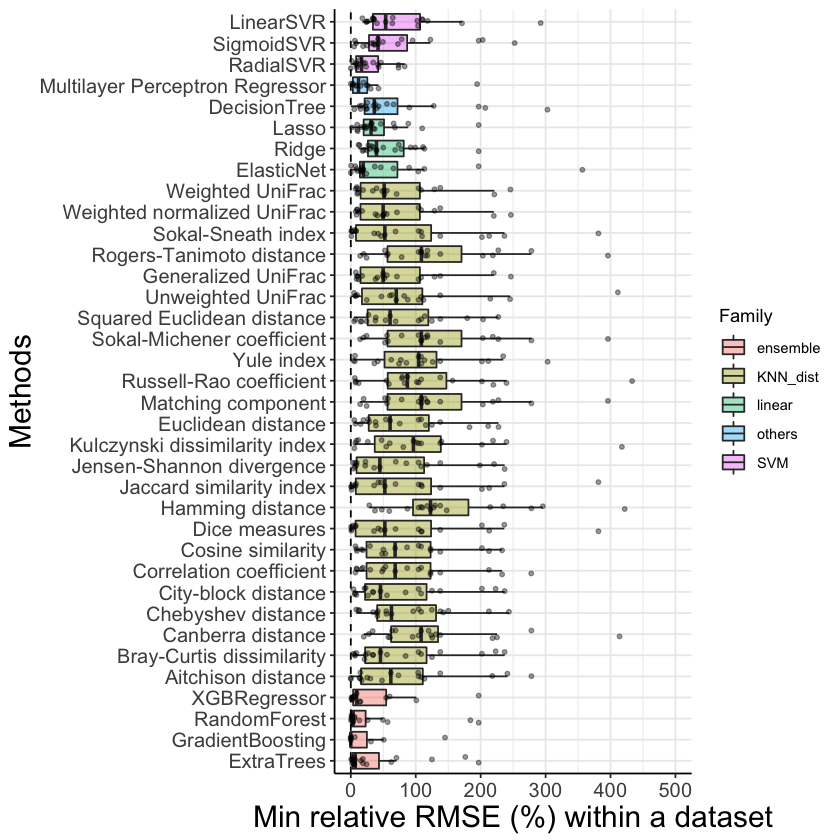

In [29]:
bp_min_relative_RMSE<-ggplot(data_summ, aes(x=NAME, y=min_relative_RMSE)) +
    geom_boxplot( aes(fill=Family), alpha=0.4, outlier.shape = NA) + 
    geom_jitter(width= 0.2,size=1,alpha=0.4) + # aes(color=Family), position=position_jitterdodge(jitter.width= 0.2,dodge.width = 0.8)
    ylab("Min relative RMSE (%) within a dataset")+ xlab("Methods")+
    geom_hline(yintercept=0, linetype="dashed")+
    coord_flip()+
    ylim(c(0, 500))+
    #facet_wrap(~DATASET, scales = "free_y", ncol=6)+
    theme_bw()+
    theme(#axis.text.x = element_text(angle = 90, vjust=0.5, hjust = 1,size=12),
        axis.text.y = element_text(size=12),
        axis.text.x = element_text(size=12), 
        axis.title = element_text(size=18),
        axis.line = element_line(color="black"),
        strip.background = element_rect(colour = "white"),
        panel.border = element_blank())
bp_min_relative_RMSE
ggsave(filename=paste(outpath, "min_relativeRMSE_0-500.ML_colbyFamily.boxplot.pdf",sep=""),plot=bp_min_relative_RMSE, height=6, width=10)


Loading required package: viridisLite
Warning message:
“Removed 595 rows containing missing values (geom_text).”

Warning message:
“Removed 595 rows containing missing values (geom_text).”

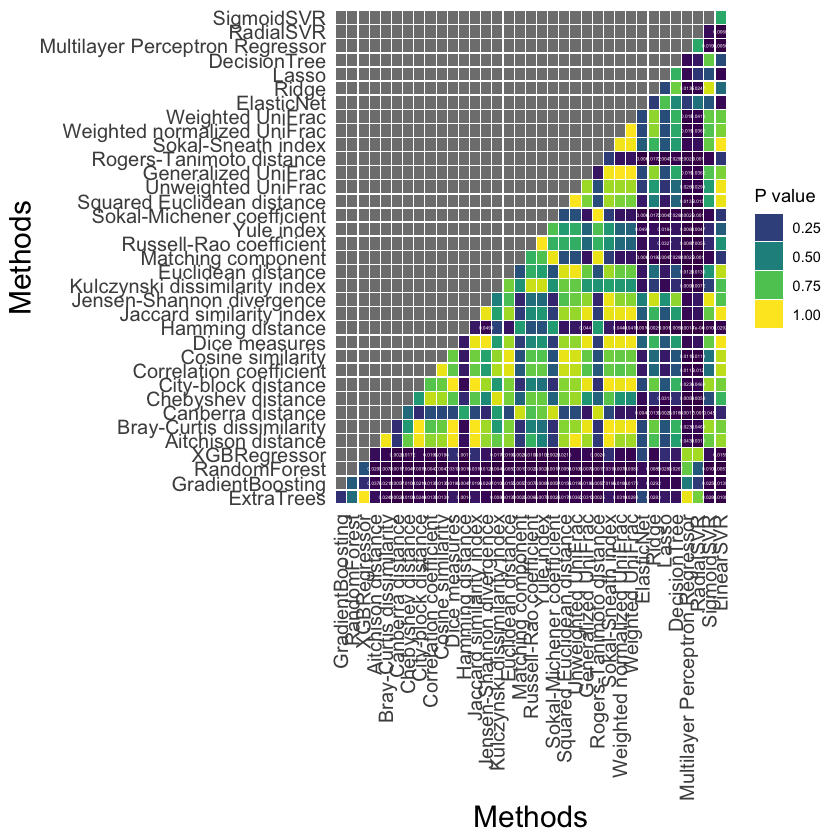

In [27]:
suppressWarnings(p_min_relative_RMSE<-pairwise.wilcox.test(data_summ$min_relative_RMSE, data_summ$NAME, p.adjust.method = "BH"))
p_min_relative_mat1<-round(p_min_relative_RMSE$p.value, 4)
#data.frame(expand.grid(dimnames(p_mat1)),array(p_mat1))
p_min_relative_mat1_m<-melt(p_min_relative_mat1)
p_min_relative_mat1_m$IfSig<-factor(p_min_relative_mat1_m$value<0.05)
p_min_relative_mat1_m$valueIfSig<-ifelse(p_min_relative_mat1_m$IfSig==TRUE, p_min_relative_mat1_m$value, "")
library(viridis)
p_min_relative_RMSE<-ggplot(p_min_relative_mat1_m, aes(x=Var1, y=Var2, z=value)) + 
  xlab("Methods")+ylab("Methods")+
  geom_tile(aes(fill = value, width=0.9, height=0.9), size=0.2) + #
  scale_color_manual(values=c("white","grey80"))+
  guides(fill=guide_legend(title="P value"))+
  geom_text(aes(label = valueIfSig), size=1, color="white") + # color="white"
  #scale_color_manual(values=c("white","grey80"))+
  scale_fill_viridis()+ 
  theme_bw() + theme_classic() +
  theme(axis.line = element_blank(), 
        axis.text.x = element_text(angle = 90, vjust=0.5, hjust=1, size=12),
        axis.text.y = element_text(size=12),
        axis.title = element_text(size=18),
        axis.ticks = element_blank())
p_min_relative_RMSE
ggsave(filename=paste(outpath, "min_relative_RMSE_pval_heatmap.ggplot.pdf",sep=""),plot=p_min_relative_RMSE, height=6, width=9)


Warning message:
“Removed 25 rows containing non-finite values (stat_boxplot).”Warning message:
“Removed 36 rows containing missing values (geom_point).”Warning message:
“Removed 595 rows containing missing values (geom_text).”

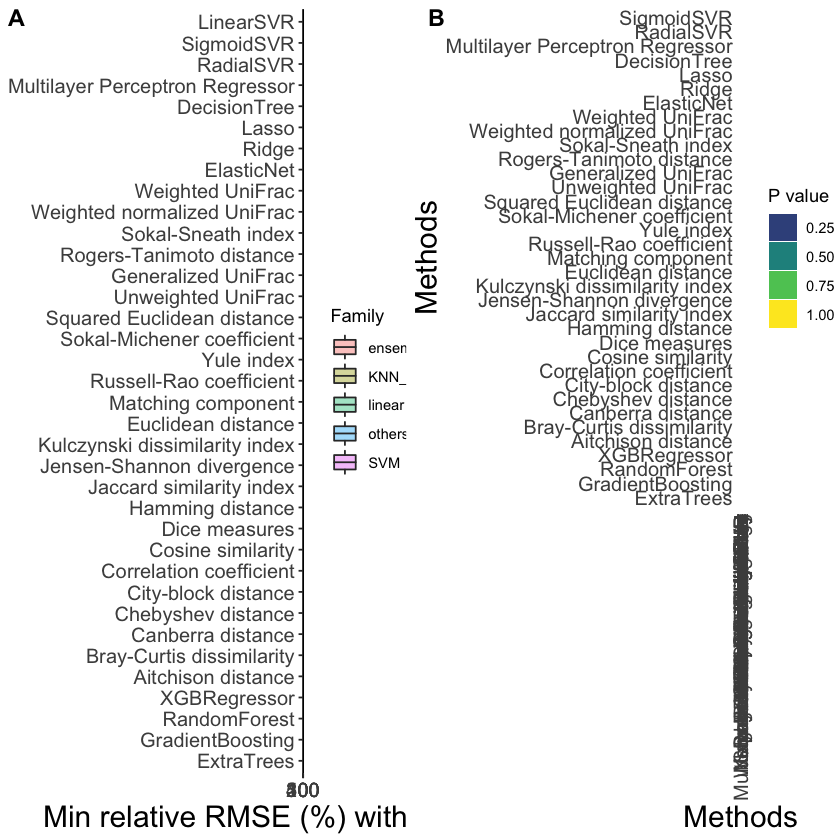

In [30]:
f_min_relative_RMSE<-plot_grid(bp_min_relative_RMSE, p_min_relative_RMSE, rel_widths = c(1, 1), labels="AUTO")
f_min_relative_RMSE
ggsave(filename=paste(outpath, "Figure1_min_relative_RMSE.pdf",sep=""), plot=f_min_relative_RMSE, height=8, width=18)

## Figure S1
### boxplot of RMSE rank within the methods on a given dataset


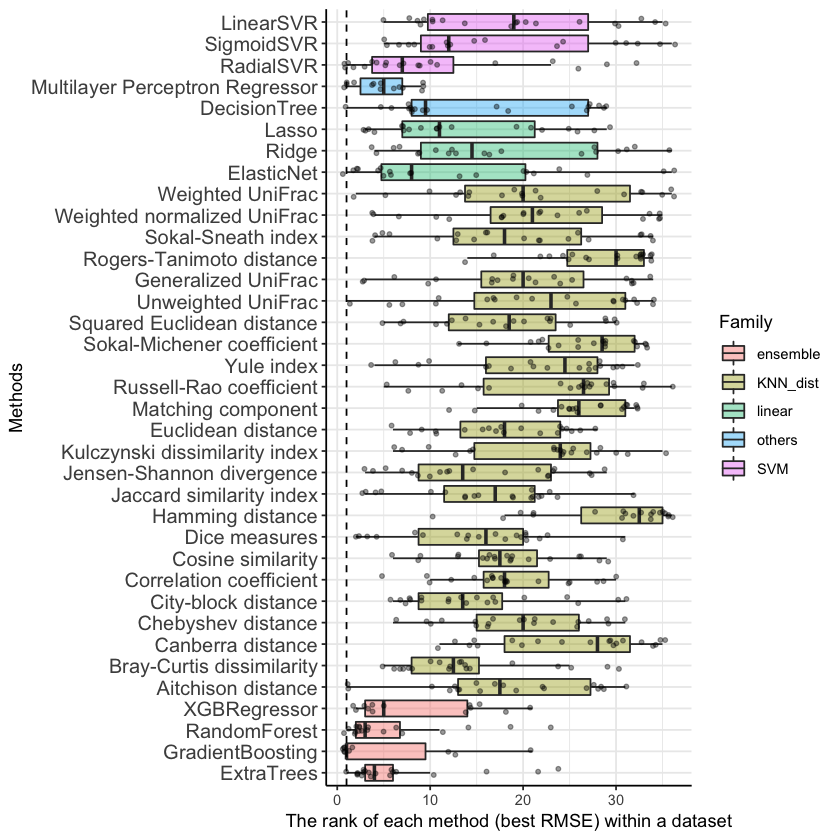

In [31]:
bp_min_RMSE_rank<-ggplot(data_summ, aes(x=NAME, y=min_RMSE_rank)) +
    geom_boxplot( aes(fill=Family), alpha=0.4, outlier.shape = NA) + 
    geom_jitter(width= 0.2,size=1,alpha=0.4) + # aes(color=Family), position=position_jitterdodge(jitter.width= 0.2,dodge.width = 0.8)
    ylab("The rank of each method (best RMSE) within a dataset")+ xlab("Methods")+
    geom_hline(yintercept=1, linetype="dashed")+
    coord_flip()+
    #ylim(c(0, 500))+
    #facet_wrap(~Dataype)+
    theme_bw()+
    theme(#axis.text.x = element_text(angle = 90, vjust=0.5, hjust = 1,size=12),
          axis.text.y = element_text(size=12),
        axis.line = element_line(color="black"),
        strip.background = element_rect(colour = "white"),
        panel.border = element_blank())
bp_min_RMSE_rank
ggsave(filename=paste(outpath, "min_RMSE_rank_ML_colbyFamily.boxplot.pdf",sep=""),plot=bp_min_RMSE_rank, height=6, width=10)


Warning message:
“Removed 595 rows containing missing values (geom_text).”

Warning message:
“Removed 595 rows containing missing values (geom_text).”

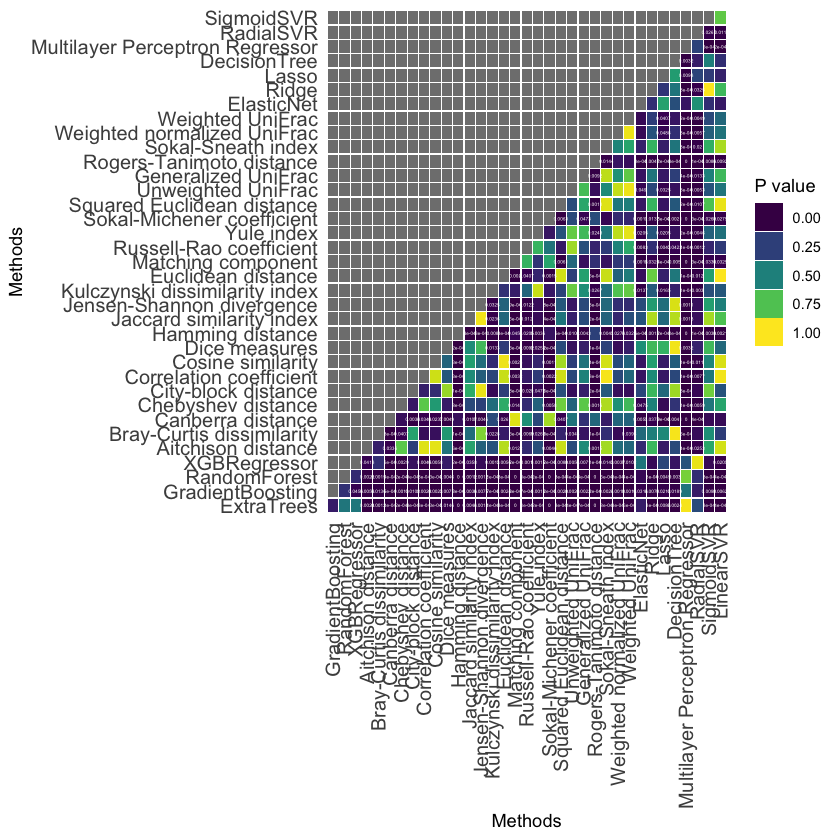

In [36]:
suppressWarnings(p_min_RMSE_rank<-pairwise.wilcox.test(data_summ$min_RMSE_rank, data_summ$NAME, p.adjust.method = "BH"))
p_min_RMSE_rank_mat1<-round(p_min_RMSE_rank$p.value, 4)
#data.frame(expand.grid(dimnames(p_mat1)),array(p_mat1))
p_min_RMSE_rank_mat1_m<-melt(p_min_RMSE_rank_mat1)
p_min_RMSE_rank_mat1_m$IfSig<-factor(p_min_RMSE_rank_mat1_m$value<0.05)
p_min_RMSE_rank_mat1_m$valueIfSig<-ifelse(p_min_RMSE_rank_mat1_m$IfSig==TRUE, p_min_RMSE_rank_mat1_m$value, "")
library(viridis)
p_min_RMSE_rank<-ggplot(p_min_RMSE_rank_mat1_m, aes(x=Var1, y=Var2, z=value)) + 
  xlab("Methods")+ylab("Methods")+
  geom_tile(aes(fill = value, width=0.9, height=0.9), size=0.2) + #
  scale_color_manual(values=c("white","grey80"))+
  guides(fill=guide_legend(title="P value"))+
  geom_text(aes(label = valueIfSig), size=1, color="white") + # color="white"
  #scale_color_manual(values=c("white","grey80"))+
  scale_fill_viridis()+ 
  theme_bw() + theme_classic() +
  theme(axis.line = element_blank(), 
        axis.text.x = element_text(angle = 90, vjust=0.5, hjust=1, size=12),
        axis.text.y = element_text(size=12),
        axis.ticks = element_blank())
p_min_RMSE_rank
ggsave(filename=paste(outpath, "min_RMSE_rank_pval_heatmap.ggplot.pdf",sep=""),plot=p_min_RMSE_rank, height=6, width=9)


Warning message:
“Removed 595 rows containing missing values (geom_text).”

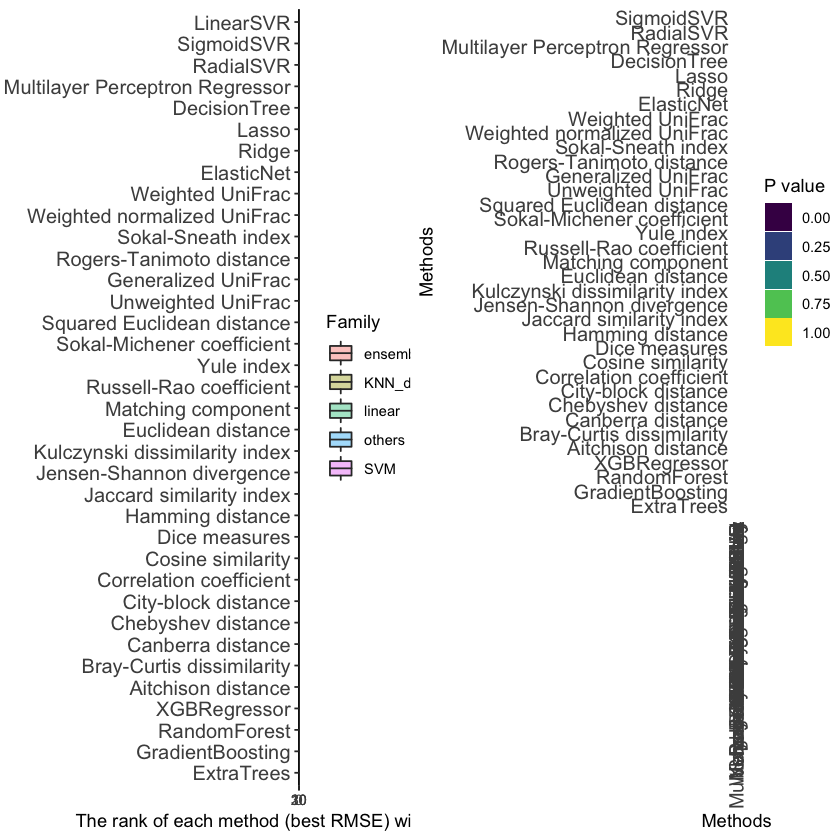

In [37]:
f_min_RMSE_rank<-plot_grid(bp_min_RMSE_rank, p_min_RMSE_rank, rel_widths = c(1, 1)) #, labels="AUTO"
f_min_RMSE_rank
ggsave(filename=paste(outpath, "FigureS1_min_RMSE_rank.pdf",sep=""),plot=f_min_RMSE_rank, height=6, width=14)

## boxplot of min (best) relative/percent RMSE within the methods on a given dataset

### boxplot of min (best) percent RMSE

Warning message:
“Removed 25 rows containing non-finite values (stat_boxplot).”Warning message:
“Removed 25 rows containing missing values (geom_point).”

Warning message:
“Removed 25 rows containing non-finite values (stat_boxplot).”Warning message:
“Removed 25 rows containing missing values (geom_point).”

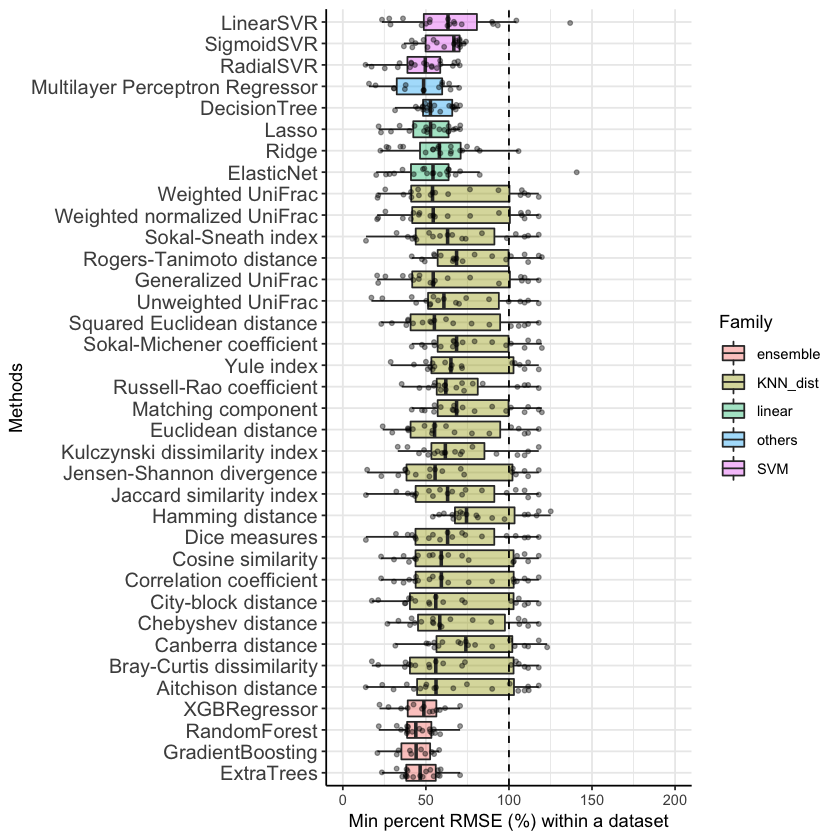

In [32]:
bp_min_perc_RMSE<-ggplot(data_summ, aes(x=NAME, y=min_perc_RMSE)) +
    geom_boxplot( aes(fill=Family), alpha=0.4, outlier.shape = NA) + 
    geom_jitter(width= 0.2,size=1,alpha=0.4) + # aes(color=Family), position=position_jitterdodge(jitter.width= 0.2,dodge.width = 0.8)
    ylab("Min percent RMSE (%) within a dataset")+ xlab("Methods")+
    geom_hline(yintercept=100, linetype="dashed")+
    ylim(c(0, 200))+
    coord_flip()+
    #facet_wrap(~DATASET, scales = "free_y", ncol=6)+
    theme_bw()+
    theme(#axis.text.x = element_text(angle = 90, vjust=0.5, hjust = 1, size=12),
        axis.text.y = element_text(size=12),
        axis.line = element_line(color="black"),
        strip.background = element_rect(colour = "white"),
        panel.border = element_blank())
bp_min_perc_RMSE
ggsave(filename=paste(outpath, "min_percRMSE_0-200.ML_colbyFamily.boxplot.pdf",sep=""),plot=bp_min_perc_RMSE, height=6, width=10)


Warning message:
“Removed 595 rows containing missing values (geom_text).”

Warning message:
“Removed 595 rows containing missing values (geom_text).”

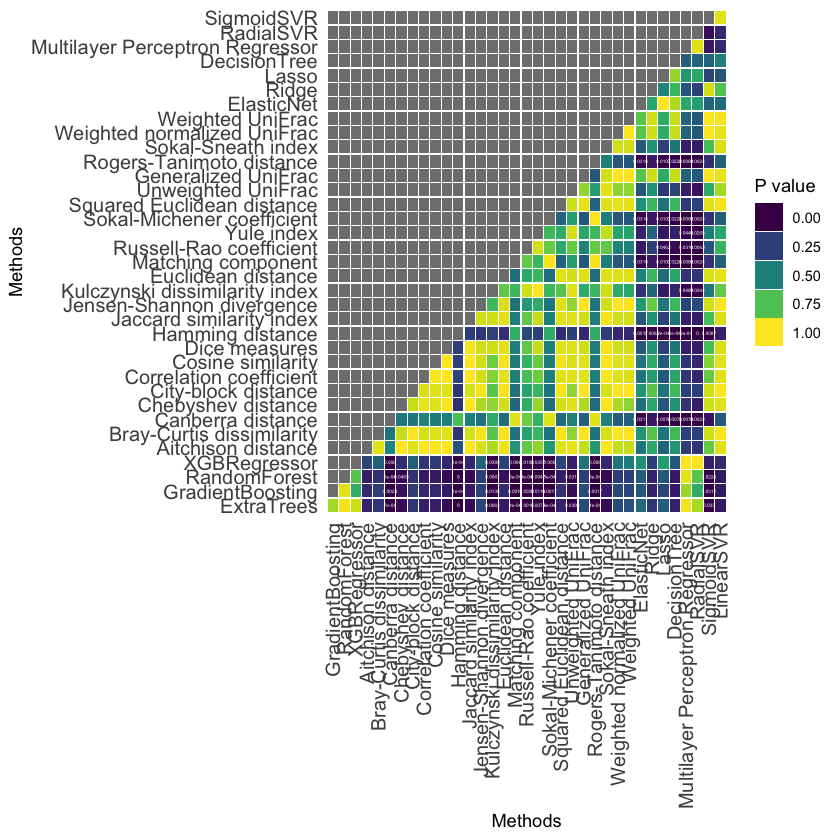

In [34]:
suppressWarnings(p_min_perc_RMSE<-pairwise.wilcox.test(data_summ$min_perc_RMSE, data_summ$NAME, p.adjust.method = "BH"))
p_min_perc_mat1<-round(p_min_perc_RMSE$p.value, 4)
#data.frame(expand.grid(dimnames(p_mat1)),array(p_mat1))
p_min_perc_mat1_m<-melt(p_min_perc_mat1)
p_min_perc_mat1_m$IfSig<-factor(p_min_perc_mat1_m$value<0.05)
p_min_perc_mat1_m$valueIfSig<-ifelse(p_min_perc_mat1_m$IfSig==TRUE, p_min_perc_mat1_m$value, "")
library(viridis)
p_min_perc_RMSE<-ggplot(p_min_perc_mat1_m, aes(x=Var1, y=Var2, z=value)) + 
  xlab("Methods")+ylab("Methods")+
  geom_tile(aes(fill = value, width=0.9, height=0.9), size=0.2) + #
  scale_color_manual(values=c("white","grey80"))+
  guides(fill=guide_legend(title="P value"))+
  geom_text(aes(label = valueIfSig), size=1, color="white") + # color="white"
  #scale_color_manual(values=c("white","grey80"))+
  scale_fill_viridis()+ 
  theme_bw() + theme_classic() +
  theme(axis.line = element_blank(), 
        axis.text.x = element_text(angle = 90, vjust=0.5, hjust=1, size=12),
        axis.text.y = element_text(size=12),
        axis.ticks = element_blank())
p_min_perc_RMSE
ggsave(filename=paste(outpath, "min_perc_RMSE_pval_heatmap.ggplot.pdf",sep=""),plot=p_min_perc_RMSE, height=6, width=9)


Warning message:
“Removed 25 rows containing non-finite values (stat_boxplot).”Warning message:
“Removed 25 rows containing missing values (geom_point).”Warning message:
“Removed 595 rows containing missing values (geom_text).”

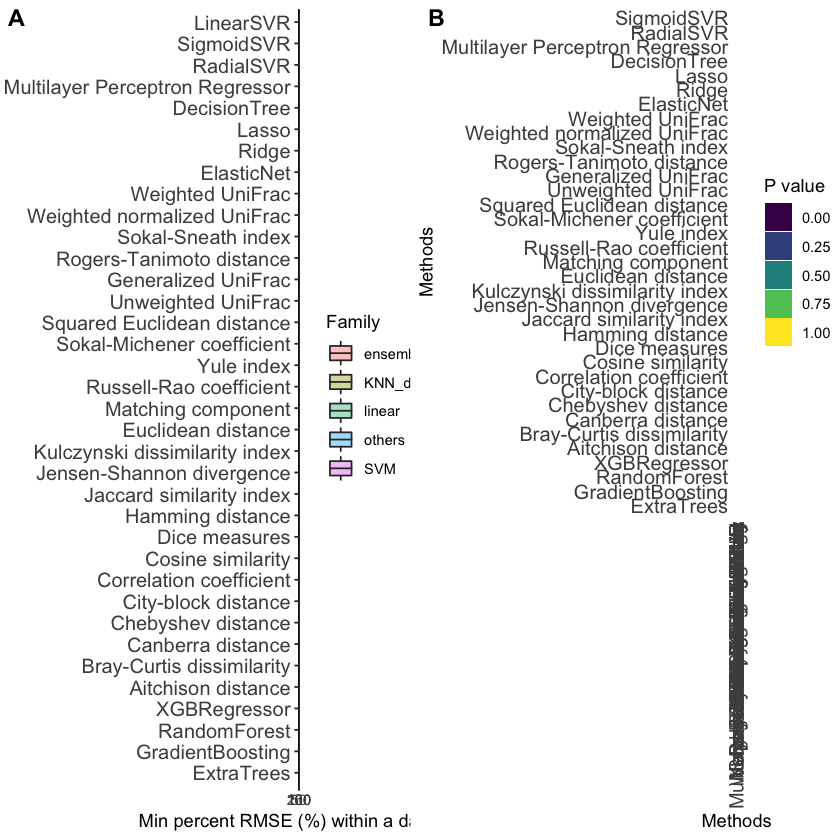

In [35]:
f_min_perc_RMSE<-plot_grid(bp_min_perc_RMSE, p_min_perc_RMSE, rel_widths = c(1, 1), labels="AUTO")#
f_min_perc_RMSE
ggsave(filename=paste(outpath, "FigureS1_min_perc_RMSE.pdf",sep=""),plot=f_min_perc_RMSE, height=8, width=14)

Warning message:
“Removed 25 rows containing non-finite values (stat_boxplot).”Warning message:
“Removed 25 rows containing missing values (geom_point).”Warning message:
“Removed 595 rows containing missing values (geom_text).”Warning message:
“Removed 595 rows containing missing values (geom_text).”

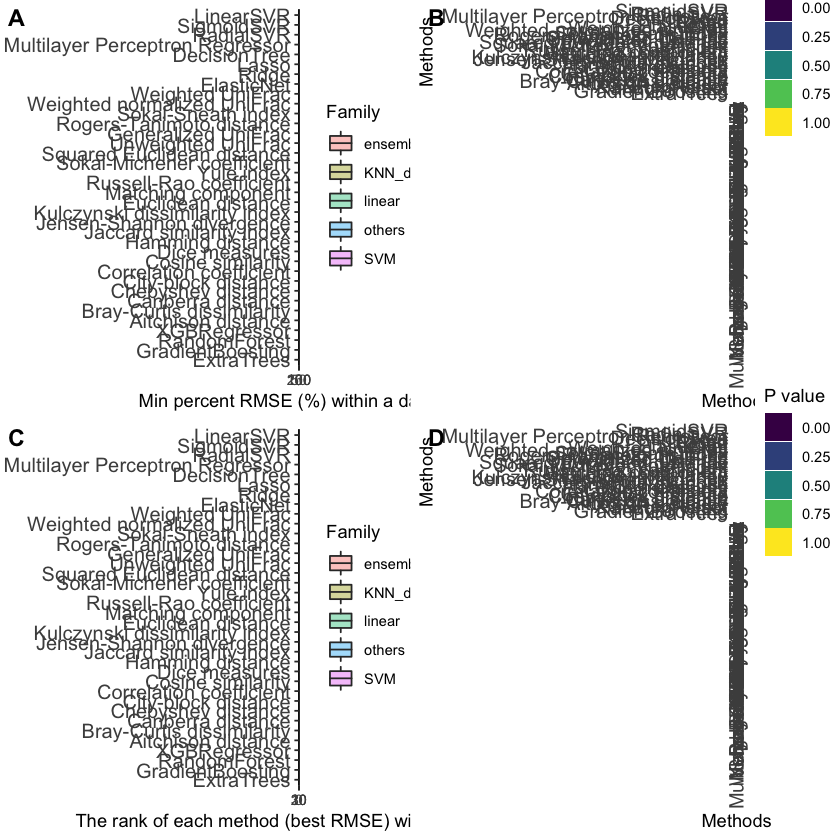

In [38]:
f_S1<-plot_grid(bp_min_perc_RMSE, p_min_perc_RMSE, bp_min_RMSE_rank, p_min_RMSE_rank, labels="AUTO")
f_S1
ggsave(filename=paste(outpath, "FigureS1.pdf",sep=""),plot=f_S1, height=15, width=18)


## Figure S2

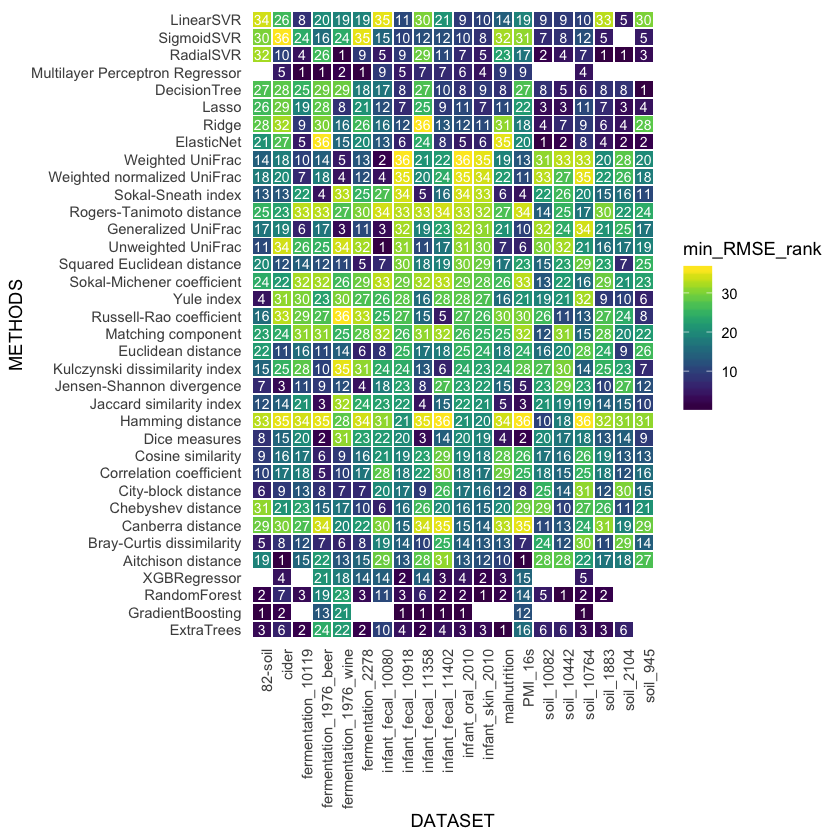

In [39]:
library(viridis)
p_minRMSErank<-ggplot(data_summ, aes(x=DATASET, y=NAME, z=min_RMSE_rank)) + 
  xlab("DATASET")+ylab("METHODS")+
  geom_tile(aes(fill = min_RMSE_rank, width=0.9, height=0.9), size=1) + #
  scale_color_manual(values=c("white","grey80"))+
  geom_text(aes(label = round(min_RMSE_rank, 0)),size=3, color = "white") +
  scale_fill_viridis()+ 
  theme_bw() + theme_classic() +
  theme(axis.line = element_blank(), axis.text.x = element_text(angle = 90, hjust=1),
        axis.ticks = element_blank())
p_minRMSErank
ggsave(filename=paste(outpath, "FigureS2_min_RMSE_rank_heatmap.pdf",sep=""),plot=p_minRMSErank, height=8, width=8)


## Figure S3
## Boxplot of median relative/percent RMSE within the methods on a given dataset

Warning message:
“Removed 48389 rows containing non-finite values (stat_boxplot).”Warning message:
“Removed 45293 rows containing missing values (geom_point).”

Warning message:
“Removed 48389 rows containing non-finite values (stat_boxplot).”Warning message:
“Removed 45293 rows containing missing values (geom_point).”

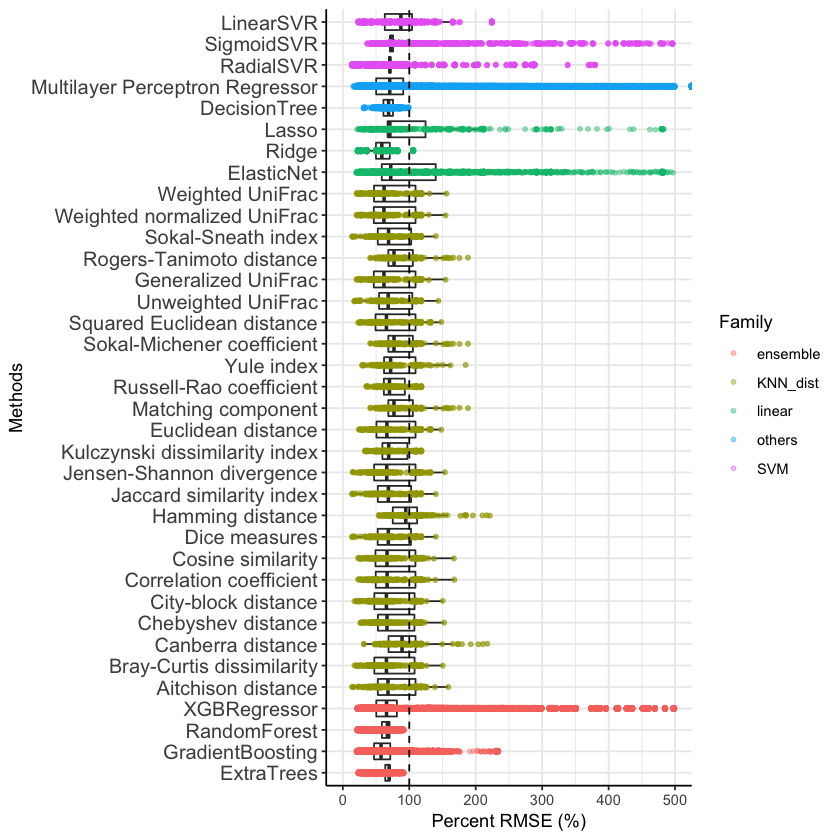

In [14]:
bp_percRMSE<-ggplot(data, aes(x=NAME, y=X.RMSE)) +
    geom_boxplot( outlier.shape = NA) + 
    geom_jitter(aes(color=Family), position=position_jitterdodge(jitter.width= 0.2,dodge.width = 0.8),size=1,alpha=0.4) +
    ylab("Percent RMSE (%)")+ xlab("Methods")+
    geom_hline(yintercept=100, linetype="dashed")+
    coord_flip()+
    ylim(c(0, 500))+
    #facet_wrap(~DATASET, scales = "free_y", ncol=6)+
    theme_bw()+
    theme(#axis.text.x = element_text(angle = 90, vjust=0.5, hjust = 1, size=12),
        axis.text.y = element_text(size=12),
        axis.line = element_line(color="black"),
        strip.background = element_rect(colour = "white"),
        panel.border = element_blank())
bp_percRMSE
ggsave(filename=paste(outpath, "percRMSE_0-500.ML_colbyFamily.boxplot.pdf",sep=""),plot=bp_percRMSE, height=10, width=10)


Warning message:
“Removed 62035 rows containing non-finite values (stat_boxplot).”Warning message:
“Removed 58939 rows containing missing values (geom_point).”

Warning message:
“Removed 62035 rows containing non-finite values (stat_boxplot).”Warning message:
“Removed 58939 rows containing missing values (geom_point).”

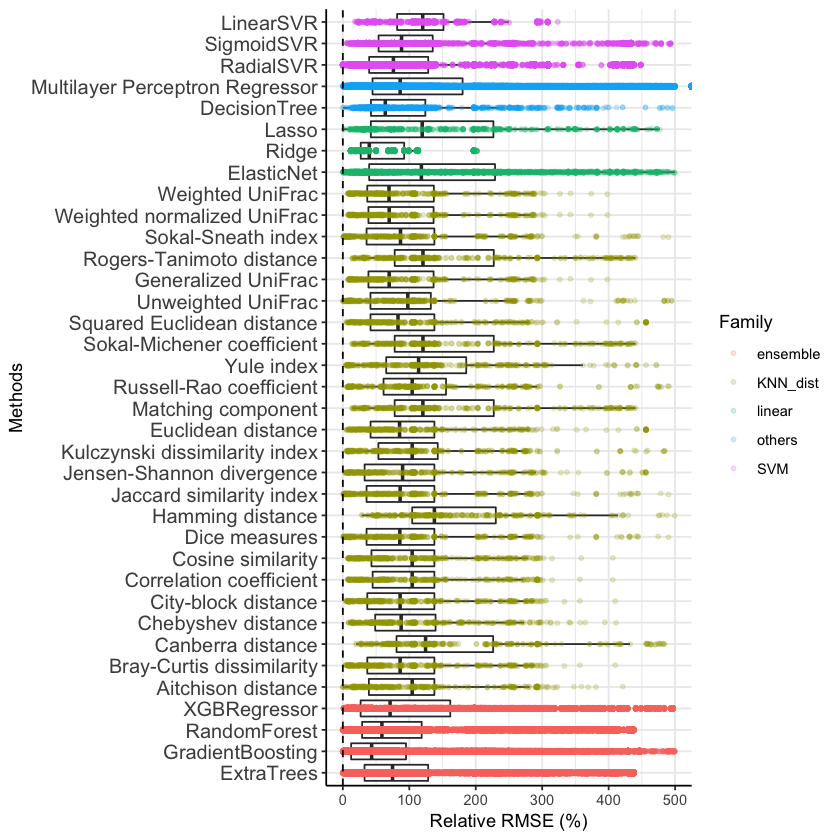

In [15]:
bp_relRMSE<-ggplot(data, aes(x=NAME, y=relative_RMSE)) +
    geom_boxplot( outlier.shape = NA) + 
    geom_jitter(aes(color=Family), position=position_jitterdodge(jitter.width= 0.2,dodge.width = 0.8),size=1,alpha=0.2) +
    ylab("Relative RMSE (%)")+ xlab("Methods")+
    geom_hline(yintercept=0, linetype="dashed")+
    coord_flip()+
    ylim(c(0, 500))+
    #facet_wrap(~DATASET, scales = "free_y", ncol=6)+
    theme_bw()+
    theme(#axis.text.x = element_text(angle = 90, vjust=0.5, hjust = 1, size=12),
        axis.text.y = element_text(size=12),
        axis.line = element_line(color="black"),
        strip.background = element_rect(colour = "white"),
        panel.border = element_blank())
bp_relRMSE
ggsave(filename=paste(outpath, "RMSE_0-500.ML_colbyFamily.boxplot.pdf",sep=""),plot=bp_relRMSE, height=10, width=10)

## To quantify the performance difference between methods

Loading required package: viridisLite
Warning message:
“Removed 595 rows containing missing values (geom_text).”

Warning message:
“Removed 595 rows containing missing values (geom_text).”

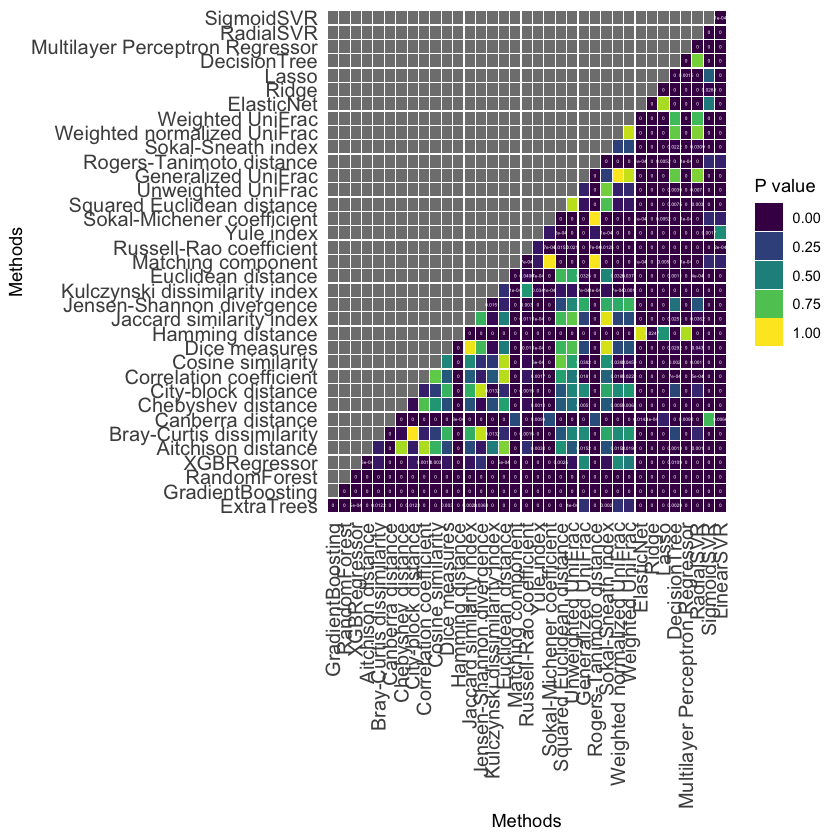

In [16]:
suppressWarnings(p_relative_RMSE<-pairwise.wilcox.test(data$relative_RMSE, data$NAME, p.adjust.method = "BH"))
p_relative_mat1<-round(p_relative_RMSE$p.value, 4)
#data.frame(expand.grid(dimnames(p_mat1)),array(p_mat1))
p_relative_mat1_m<-melt(p_relative_mat1)
p_relative_mat1_m$IfSig<-factor(p_relative_mat1_m$value<0.05)
p_relative_mat1_m$valueIfSig<-ifelse(p_relative_mat1_m$IfSig==TRUE, p_relative_mat1_m$value, "")
library(viridis)
p_relative_RMSE<-ggplot(p_relative_mat1_m, aes(x=Var1, y=Var2, z=value)) + 
  xlab("Methods")+ylab("Methods")+
  geom_tile(aes(fill = value, width=0.9, height=0.9), size=0.2) + #
  scale_color_manual(values=c("white","grey80"))+
  guides(fill=guide_legend(title="P value"))+
  geom_text(aes(label = valueIfSig), size=1, color="white") + # color="white"
  #scale_color_manual(values=c("white","grey80"))+
  scale_fill_viridis()+ 
  theme_bw() + theme_classic() +
  theme(axis.line = element_blank(), 
        axis.text.x = element_text(angle = 90, vjust=0.5, hjust=1, size=12),
        axis.text.y = element_text(size=12),
        axis.ticks = element_blank())
p_relative_RMSE
ggsave(filename=paste(outpath, "relative_RMSE_pval_heatmap.ggplot.pdf",sep=""),plot=p_relative_RMSE, height=6, width=9)


Warning message:
“Removed 62035 rows containing non-finite values (stat_boxplot).”Warning message:
“Removed 58939 rows containing missing values (geom_point).”Warning message:
“Removed 595 rows containing missing values (geom_text).”

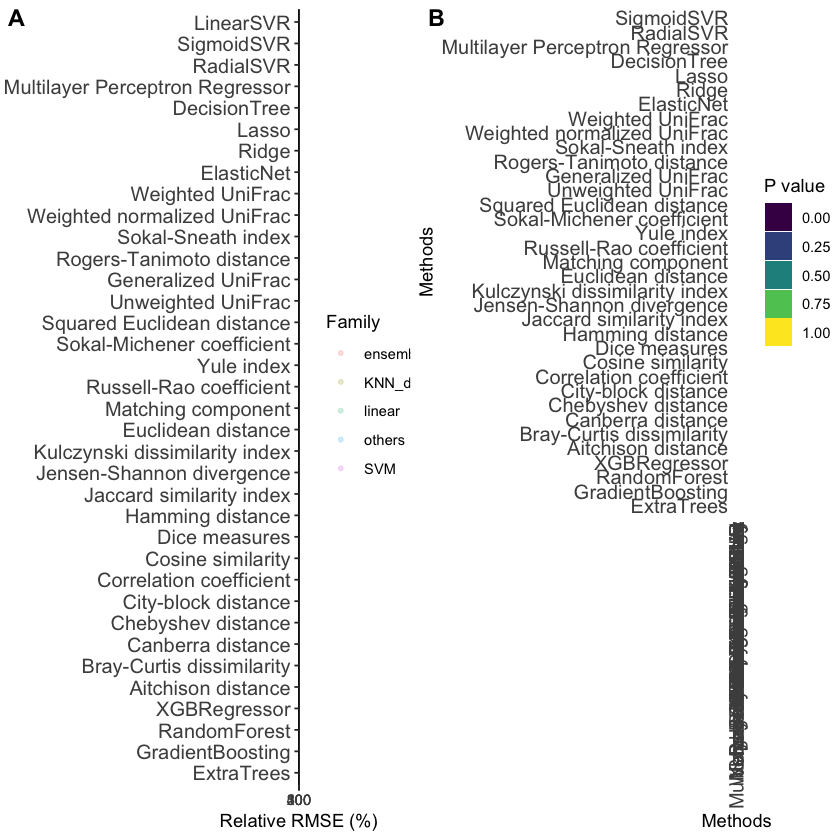

In [17]:
f1_S1<-plot_grid(bp_relRMSE, p_relative_RMSE, rel_widths = c(1, 1), labels="AUTO")
f1_S1
ggsave(filename=paste(outpath, "FigureS1_relRMSE.pdf",sep=""),plot=f1_S1, height=7, width=14)

Warning message:
“Removed 595 rows containing missing values (geom_text).”

Warning message:
“Removed 595 rows containing missing values (geom_text).”

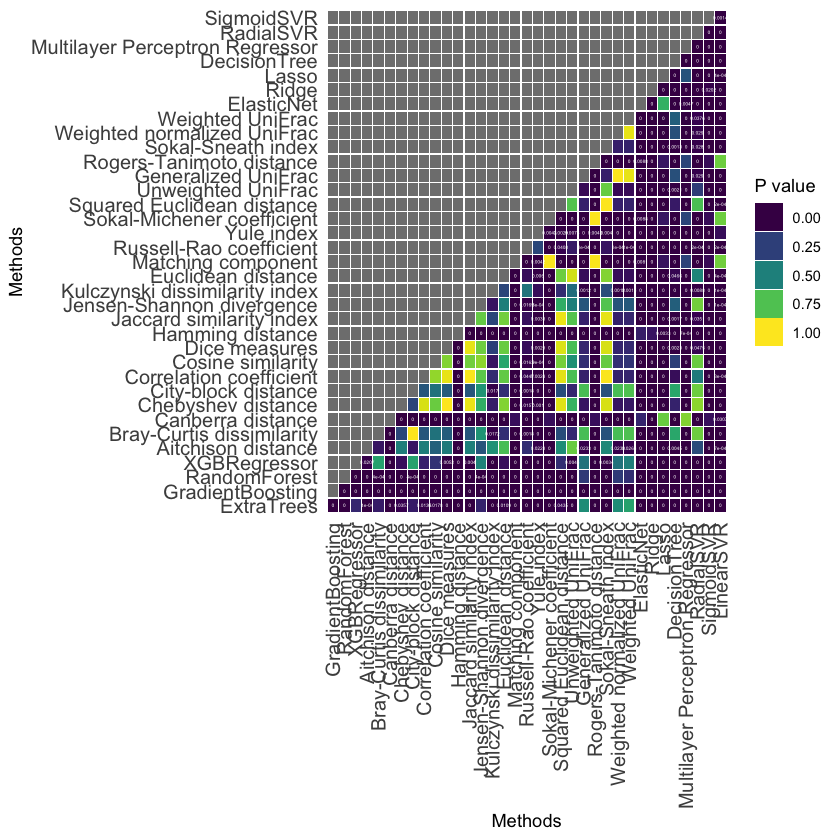

In [18]:
suppressWarnings(p_perc_RMSE<-pairwise.wilcox.test(data$X.RMSE, data$NAME, p.adjust.method = "BH"))
p_perc_mat1<-round(p_perc_RMSE$p.value, 4)
#data.frame(expand.grid(dimnames(p_mat1)),array(p_mat1))
p_perc_mat1_m<-melt(p_perc_mat1)
p_perc_mat1_m$IfSig<-factor(p_perc_mat1_m$value<0.05)
p_perc_mat1_m$valueIfSig<-ifelse(p_perc_mat1_m$IfSig==TRUE, p_perc_mat1_m$value, "")
library(viridis)
p_perc_RMSE<-ggplot(p_perc_mat1_m, aes(x=Var1, y=Var2, z=value)) + 
  xlab("Methods")+ylab("Methods")+
  geom_tile(aes(fill = value, width=0.9, height=0.9), size=0.2) + #
  scale_color_manual(values=c("white","grey80"))+
  guides(fill=guide_legend(title="P value"))+
  geom_text(aes(label = valueIfSig), size=1, color="white") + # color="white"
  #scale_color_manual(values=c("white","grey80"))+
  scale_fill_viridis()+ 
  theme_bw() + theme_classic() +
  theme(axis.line = element_blank(), 
        axis.text.x = element_text(angle = 90, vjust=0.5, hjust=1, size=12),
        axis.text.y = element_text(size=12),
        axis.ticks = element_blank())
p_perc_RMSE
ggsave(filename=paste(outpath, "perc_RMSE_pval_heatmap.ggplot.pdf",sep=""),plot=p_perc_RMSE, height=6, width=9)


Warning message:
“Removed 62035 rows containing non-finite values (stat_boxplot).”Warning message:
“Removed 58939 rows containing missing values (geom_point).”Warning message:
“Removed 595 rows containing missing values (geom_text).”Warning message:
“Removed 48389 rows containing non-finite values (stat_boxplot).”Warning message:
“Removed 45293 rows containing missing values (geom_point).”Warning message:
“Removed 595 rows containing missing values (geom_text).”

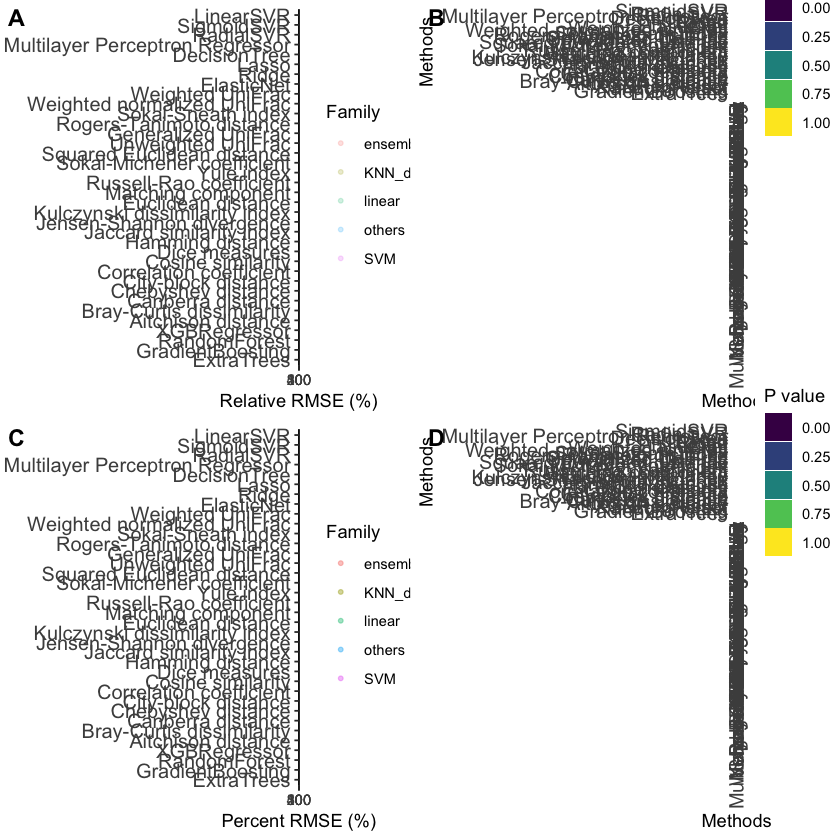

In [23]:
f_S4<-plot_grid(bp_relRMSE, p_relative_RMSE, bp_percRMSE, p_perc_RMSE, rel_widths = c(1, 1), labels="AUTO")
f_S4
ggsave(filename=paste(outpath, "FigureS3_RMSE.pdf",sep=""),plot=f_S4, height=16, width=18)
ggsave(filename=paste(outpath, "FigureS3_RMSE.png",sep=""),device="png", plot=f_S4, height=16, width=18)

## Figure S5
## Add DATASET2 including datasize info

In [41]:
DATASET<-unique(data$DATASET)
Datasize<-unique(data$Datasize)
n_samples<-unique(data$n_samples)
n_features<-unique(data$n_features)

labs <- paste(DATASET, ": ", n_samples, "*",n_features, sep="")
#names(labs) <- unique(data$DATASET)
labs
data$DATASET2<-factor(data$DATASET, labels=labs)
summary(data$DATASET2)

[1] "82-soil: 74*21203"              "cider: 170*255"                
 [3] "fermentation_10119: 686*1601"   "fermentation_1976_beer: 17*295"
 [5] "fermentation_1976_wine: 11*246" "fermentation_2278: 110*281"    
 [7] "infant_fecal_10080: 184*8729"   "infant_fecal_10918: 172*731"   
 [9] "infant_fecal_11358: 106*1708"   "infant_fecal_11402: 188*1252"  
[11] "infant_oral_2010: 105*450"      "infant_skin_2010: 311*2616"    
[13] "malnutrition: 533*1164"         "PMI_16s: 337*6553"             
[15] "soil_10082: 221*20479"          "soil_10442: 629*55105"         
[17] "soil_10764: 266*142"            "soil_1883: 520*19385"          
[19] "soil_2104: 1160*114050"         "soil_945: 1041*24753"

82-soil: 74*21203                 cider: 170*255 
                         34514                          50114 
  fermentation_10119: 686*1601 fermentation_1976_beer: 17*295 
                         30114                          50114 
fermentation_1976_wine: 11*246     fermentation_2278: 110*281 
                         50114                          37314 
  infant_fecal_10080: 184*8729    infant_fecal_10918: 172*731 
                         37314                          50114 
  infant_fecal_11358: 106*1708   infant_fecal_11402: 188*1252 
                         50114                          50114 
     infant_oral_2010: 105*450     infant_skin_2010: 311*2616 
                         50114                          37314 
        malnutrition: 533*1164              PMI_16s: 337*6553 
                         37311                          50113 
         soil_10082: 221*20479          soil_10442: 629*55105 
                         21714                          21714 
           soil_10764: 266*142           soil_1883: 520*19385 
                         50114                          21714 
        soil_2104: 1160*114050           soil_945: 1041*24753 
                         11374                           4554

## The faceted plot of performance of all benchmarked methods

### Relative RMSE: 1-(RMSE / minimal RMSE).

Warning message:
“Removed 62035 rows containing non-finite values (stat_boxplot).”Warning message:
“Removed 58939 rows containing missing values (geom_point).”

Warning message:
“Removed 62035 rows containing non-finite values (stat_boxplot).”Warning message:
“Removed 58939 rows containing missing values (geom_point).”

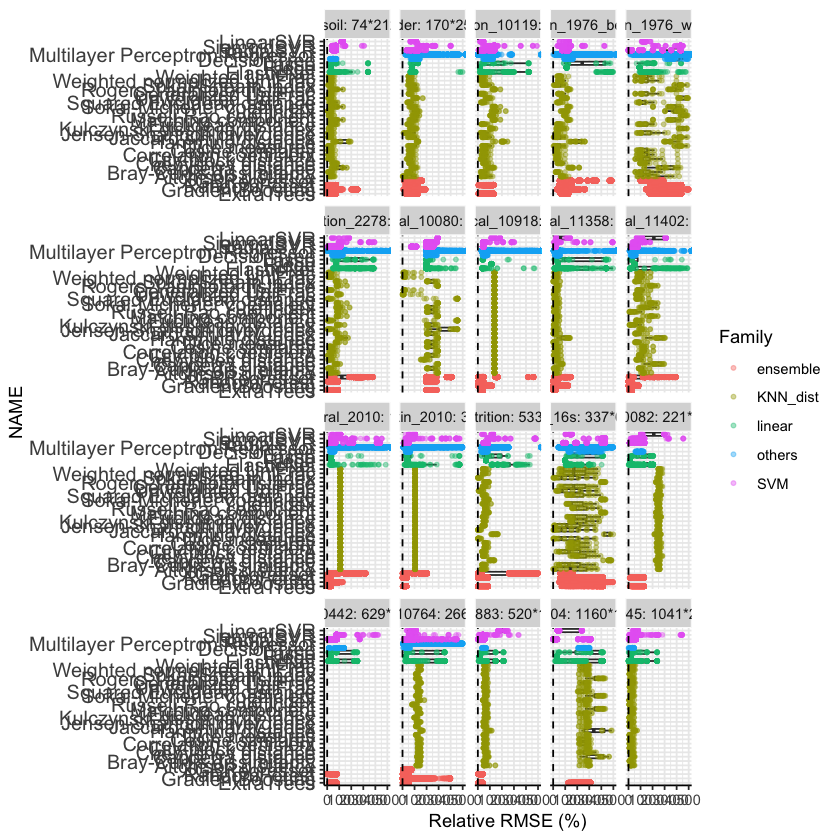

In [21]:

facets_relRMSE<-ggplot(data, aes(x=NAME, y=relative_RMSE)) +
    geom_boxplot( outlier.shape = NA) + 
    geom_jitter(aes(color=Family), position=position_jitterdodge(jitter.width= 0.2,dodge.width = 0.8),size=1,alpha=0.4) +
    ylab("Relative RMSE (%)")+ #xlab("Mean run time (sec)")+
    geom_hline(yintercept=0, linetype="dashed")+
    coord_flip()+
    ylim(c(0, 500))+
    facet_wrap(~DATASET2, ncol=5)+
    theme_bw()+
    theme(#axis.text.x = element_text(angle = 90, hjust = 1, size=12),
          axis.text.y = element_text(size=12),
        axis.line = element_line(color="black"),
        strip.background = element_rect(colour = "white"),
        panel.border = element_blank())
facets_relRMSE
ggsave(filename=paste(outpath, "FigureS5_RMSE_0-500.ML_facets_colbyfamily.boxplot.pdf",sep=""),plot=facets_relRMSE, height=20, width=16)



In [22]:
ggsave(filename=paste(outpath, "FigureS5_RMSE_0-500.ML_facets_colbyfamily.boxplot.png",sep=""), device="png", plot=facets_relRMSE, height=20, width=16)


Warning message:
“Removed 62035 rows containing non-finite values (stat_boxplot).”Warning message:
“Removed 58939 rows containing missing values (geom_point).”

## Correlation between RMSE rank and data properties (Datatype, n_samples, n_features, and Density)

## Figure 2: corrlations between performance and data features

In [40]:
data_summ$Density<-data_summ$Density/100

In [41]:
data_summ_corr<-data_summ %>% group_by(NAME) %>% 
    summarise(
        # min_RMSE_rank
        p_min_RMSE_rank_VS_Density=cor.test(min_RMSE_rank, Density)$p.value, 
        p_min_RMSE_rank_VS_log10_Density=cor.test(min_RMSE_rank, log10_Density)$p.value,
        p_min_RMSE_rank_VS_Datasize=cor.test(min_RMSE_rank, Datasize)$p.value,
        p_min_RMSE_rank_VS_n_samples=cor.test(min_RMSE_rank, n_samples)$p.value,      
        p_min_RMSE_rank_VS_n_features=cor.test(min_RMSE_rank, n_features)$p.value,
        p_min_RMSE_rank_VS_log10_n_features=cor.test(min_RMSE_rank, log10_n_features)$p.value,
        p_min_RMSE_rank_VS_fs_ratio=cor.test(min_RMSE_rank, fs_ratio)$p.value,
        p_min_RMSE_rank_VS_log10_fs_ratio=cor.test(min_RMSE_rank, log10_fs_ratio)$p.value,
        corr_min_RMSE_rank_VS_Density=cor.test(min_RMSE_rank, Density)$estimate,
        corr_min_RMSE_rank_VS_log10_Density=cor.test(min_RMSE_rank, log10_Density)$estimate,
        corr_min_RMSE_rank_VS_Datasize=cor.test(min_RMSE_rank, Datasize)$estimate,
        corr_min_RMSE_rank_VS_n_samples=cor.test(min_RMSE_rank, n_samples)$estimate,
        corr_min_RMSE_rank_VS_n_features=cor.test(min_RMSE_rank, n_features)$estimate,
        corr_min_RMSE_rank_VS_log10_n_features=cor.test(min_RMSE_rank, log10_n_features)$estimate,
        corr_min_RMSE_rank_VS_fs_ratio=cor.test(min_RMSE_rank, fs_ratio)$estimate,
        corr_min_RMSE_rank_VS_log10_fs_ratio=cor.test(min_RMSE_rank, log10_fs_ratio)$estimate,
        # min_perc_RMSE
        p_min_perc_RMSE_VS_Density=cor.test(min_perc_RMSE, Density)$p.value, 
        p_min_perc_RMSE_VS_log10_Density=cor.test(min_perc_RMSE, log10_Density)$p.value, 
        p_min_perc_RMSE_VS_Datasize=cor.test(min_perc_RMSE, Datasize)$p.value,
        p_min_perc_RMSE_VS_n_samples=cor.test(min_perc_RMSE, n_samples)$p.value,      
        p_min_perc_RMSE_VS_n_features=cor.test(min_perc_RMSE, n_features)$p.value,
        p_min_perc_RMSE_VS_log10_n_features=cor.test(min_perc_RMSE, log10_n_features)$p.value,
        corr_min_perc_RMSE_VS_Density=cor.test(min_perc_RMSE, Density)$estimate,
        corr_min_perc_RMSE_VS_log10_Density=cor.test(min_perc_RMSE, log10_Density)$estimate,
        corr_min_perc_RMSE_VS_Datasize=cor.test(min_perc_RMSE, Datasize)$estimate,
        corr_min_perc_RMSE_VS_n_samples=cor.test(min_perc_RMSE, n_samples)$estimate,
        corr_min_perc_RMSE_VS_n_features=cor.test(min_perc_RMSE, n_features)$estimate,
        corr_min_perc_RMSE_VS_log10_n_features=cor.test(min_perc_RMSE, log10_n_features)$estimate,
        
        # min_relative_RMSE
        p_min_relative_RMSE_VS_Density=cor.test(min_relative_RMSE, Density)$p.value,
        p_min_relative_RMSE_VS_log10_Density=cor.test(min_relative_RMSE, log10_Density)$p.value,
        p_min_relative_RMSE_VS_Datasize=cor.test(min_relative_RMSE, Datasize)$p.value,
        p_min_relative_RMSE_VS_n_samples=cor.test(min_relative_RMSE, n_samples)$p.value,
        p_min_relative_RMSE_VS_n_features=cor.test(min_relative_RMSE, n_features)$p.value,
        p_min_relative_RMSE_VS_log10_n_features=cor.test(min_relative_RMSE, log10_n_features)$p.value,
        p_min_relative_RMSE_VS_fs_ratio=cor.test(min_relative_RMSE, fs_ratio)$p.value,
        p_min_relative_RMSE_VS_log10_fs_ratio=cor.test(min_relative_RMSE, log10_fs_ratio)$p.value,
        corr_min_relative_RMSE_VS_Density=cor.test(min_relative_RMSE, Density)$estimate,
        corr_min_relative_RMSE_VS_log10_Density=cor.test(min_relative_RMSE, log10_Density)$estimate,
        corr_min_relative_RMSE_VS_Datasize=cor.test(min_relative_RMSE, Datasize)$estimate,
        corr_min_relative_RMSE_VS_n_samples=cor.test(min_relative_RMSE, n_samples)$estimate,
        corr_min_relative_RMSE_VS_n_features=cor.test(min_relative_RMSE, n_features)$estimate,
        corr_min_relative_RMSE_VS_log10_n_features=cor.test(min_relative_RMSE, log10_n_features)$estimate,
        corr_min_relative_RMSE_VS_fs_ratio=cor.test(min_relative_RMSE, fs_ratio)$estimate,
        corr_min_relative_RMSE_VS_log10_fs_ratio=cor.test(min_relative_RMSE, log10_fs_ratio)$estimate
        )
head(data_summ_corr)

NAME                      p_min_RMSE_rank_VS_Density
1 ExtraTrees                0.0045748715              
2 GradientBoosting          0.0069585515              
3 RandomForest              0.0009268932              
4 XGBRegressor              0.0198050661              
5 Aitchison distance        0.9036328832              
6 Bray-Curtis dissimilarity 0.1193103172              
  p_min_RMSE_rank_VS_log10_Density p_min_RMSE_rank_VS_Datasize
1 0.19162153                       0.87979198                 
2 0.08524751                       0.79326631                 
3 0.11562362                       0.35705097                 
4 0.21379162                       0.60493937                 
5 0.63939315                       0.63815974                 
6 0.23854501                       0.05164889                 
  p_min_RMSE_rank_VS_n_samples p_min_RMSE_rank_VS_n_features
1 0.23910607                   0.80226801                   
2 0.39280120                   0.68258996                   
3 0.05824922                   0.31517060                   
4 0.06443543                   0.43530437                   
5 0.71036383                   0.38844901                   
6 0.13373468                   0.08556147                   
  p_min_RMSE_rank_VS_log10_n_features p_min_RMSE_rank_VS_fs_ratio
1 0.5132561                           0.78480770                 
2 0.6439256                           0.70109934                 
3 0.2855710                           0.61993201                 
4 0.9195489                           0.02692768                 
5 0.1429519                           0.35203539                 
6 0.4160817                           0.74840212                 
  p_min_RMSE_rank_VS_log10_fs_ratio corr_min_RMSE_rank_VS_Density ⋯
1 0.30731776                         0.6206515                    ⋯
2 0.41018781                         0.7865291                    ⋯
3 0.44845611                         0.7115834                    ⋯
4 0.02081139                         0.6346265                    ⋯
5 0.08960773                        -0.0289301                    ⋯
6 0.74322976                        -0.3596906                    ⋯
  p_min_relative_RMSE_VS_fs_ratio p_min_relative_RMSE_VS_log10_fs_ratio
1 8.783179e-01                    0.13241820                           
2 7.596747e-01                    0.47954520                           
3 8.704363e-01                    0.30915431                           
4 1.763440e-06                    0.00868004                           
5 4.198911e-01                    0.14570271                           
6 4.319487e-01                    0.17356165                           
  corr_min_relative_RMSE_VS_Density corr_min_relative_RMSE_VS_log10_Density
1  0.3263021                        -0.13715150                            
2  0.8203373                         0.58366304                            
3  0.4304341                        -0.05705091                            
4  0.1602194                        -0.34583106                            
5 -0.1928851                        -0.29034675                            
6 -0.2080234                        -0.28659093                            
  corr_min_relative_RMSE_VS_Datasize corr_min_relative_RMSE_VS_n_samples
1  0.30765629                         0.04392161                        
2  0.02825771                        -0.31032468                        
3 -0.14524503                        -0.32346226                        
4  0.49905516                        -0.23922524                        
5  0.26281985                         0.21699205                        
6  0.27111567                         0.23207777                        
  corr_min_relative_RMSE_VS_n_features
1  0.2628551                          
2 -0.1410624                          
3 -0.1269978                          
4  0.7067435                          
5  0.4307806                          
6  0.4378050                  

In [42]:
data_summ_corrP_m<-melt(data_summ_corr[, c(1, grep("p_", names(data_summ_corr)))])
data_summ_corrP_m<-data_summ_corrP_m[order(data_summ_corrP_m$variable), ]
data_summ_corrP_m$IfSig<-ifelse(data_summ_corrP_m$value<0.05, "Sig", "NotSig")
data_summ_corrP_m$variable<-gsub("p_min_", "", data_summ_corrP_m$variable)
head(data_summ_corrP_m)

Using NAME as id variables


NAME                      variable             value        IfSig 
1 ExtraTrees                RMSE_rank_VS_Density 0.0045748715 Sig   
2 GradientBoosting          RMSE_rank_VS_Density 0.0069585515 Sig   
3 RandomForest              RMSE_rank_VS_Density 0.0009268932 Sig   
4 XGBRegressor              RMSE_rank_VS_Density 0.0198050661 Sig   
5 Aitchison distance        RMSE_rank_VS_Density 0.9036328832 NotSig
6 Bray-Curtis dissimilarity RMSE_rank_VS_Density 0.1193103172 NotSig

In [43]:
tmp<-data.frame(do.call(rbind, strsplit(as.character(data_summ_corrP_m$variable), "_VS_")))
names(tmp)<-c("Metric", "Data_property")
data_summ_corrP_m<-data.frame(tmp, data_summ_corrP_m)
head(data_summ_corrP_m)

Metric    Data_property NAME                      variable            
1 RMSE_rank Density       ExtraTrees                RMSE_rank_VS_Density
2 RMSE_rank Density       GradientBoosting          RMSE_rank_VS_Density
3 RMSE_rank Density       RandomForest              RMSE_rank_VS_Density
4 RMSE_rank Density       XGBRegressor              RMSE_rank_VS_Density
5 RMSE_rank Density       Aitchison distance        RMSE_rank_VS_Density
6 RMSE_rank Density       Bray-Curtis dissimilarity RMSE_rank_VS_Density
  value        IfSig 
1 0.0045748715 Sig   
2 0.0069585515 Sig   
3 0.0009268932 Sig   
4 0.0198050661 Sig   
5 0.9036328832 NotSig
6 0.1193103172 NotSig

In [44]:
data_summ_corr_m<-melt(data_summ_corr[, c(1, grep("corr", names(data_summ_corr)))])
data_summ_corr_m<-data_summ_corr_m[order(data_summ_corr_m$variable), ]
data_summ_corr_m$IfSig<-data_summ_corrP_m$IfSig
data_summ_corr_m$valueIfSig<-ifelse(data_summ_corr_m$IfSig=="Sig", round(data_summ_corr_m$value, 2), "")
data_summ_corr_m$variable<-gsub("corr_min_", "", data_summ_corrP_m$variable)
head(data_summ_corr_m)

Using NAME as id variables


NAME                      variable             value      IfSig  valueIfSig
1 ExtraTrees                RMSE_rank_VS_Density  0.6206515 Sig    0.62      
2 GradientBoosting          RMSE_rank_VS_Density  0.7865291 Sig    0.79      
3 RandomForest              RMSE_rank_VS_Density  0.7115834 Sig    0.71      
4 XGBRegressor              RMSE_rank_VS_Density  0.6346265 Sig    0.63      
5 Aitchison distance        RMSE_rank_VS_Density -0.0289301 NotSig           
6 Bray-Curtis dissimilarity RMSE_rank_VS_Density -0.3596906 NotSig

In [45]:
tmp<-data.frame(do.call(rbind, strsplit(as.character(data_summ_corr_m$variable), "_VS_")))
names(tmp)<-c("Metric", "Data_property")
data_summ_corr_m<-data.frame(tmp, data_summ_corr_m)
head(data_summ_corr_m)

Metric    Data_property NAME                      variable            
1 RMSE_rank Density       ExtraTrees                RMSE_rank_VS_Density
2 RMSE_rank Density       GradientBoosting          RMSE_rank_VS_Density
3 RMSE_rank Density       RandomForest              RMSE_rank_VS_Density
4 RMSE_rank Density       XGBRegressor              RMSE_rank_VS_Density
5 RMSE_rank Density       Aitchison distance        RMSE_rank_VS_Density
6 RMSE_rank Density       Bray-Curtis dissimilarity RMSE_rank_VS_Density
  value      IfSig  valueIfSig
1  0.6206515 Sig    0.62      
2  0.7865291 Sig    0.79      
3  0.7115834 Sig    0.71      
4  0.6346265 Sig    0.63      
5 -0.0289301 NotSig           
6 -0.3596906 NotSig

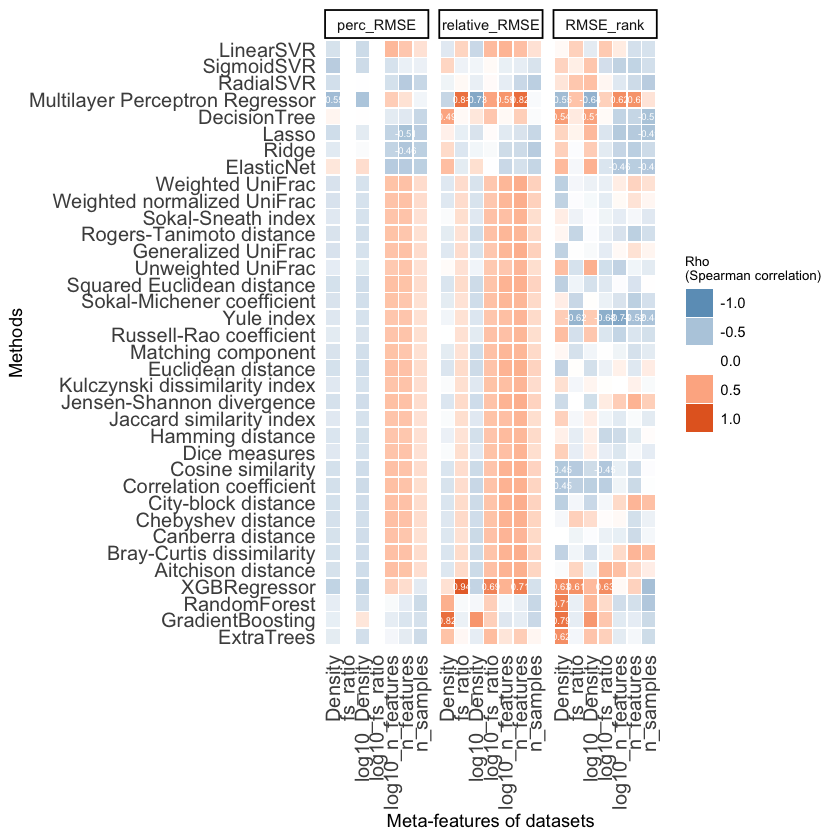

In [57]:
p_corr<-ggplot(subset(data_summ_corr_m, Data_property!="Datasize"), aes(x=Data_property, y=NAME, z=value)) + 
  xlab("Meta-features of datasets")+ylab("Methods")+
  geom_tile(aes(fill = value, width=0.9, height=0.9), size=0.2) + #
  scale_color_manual(values=c("white","grey80"))+
  
  guides(fill=guide_legend(title="Rho \n(Spearman correlation)"))+
  geom_text(aes(label = valueIfSig), size=2, color="white") + # color="white"
  #scale_color_manual(values=c("white","grey80"))+
  #scale_fill_viridis()+ 
  facet_wrap(~Metric)+
  theme_bw() + theme_classic() +
  theme(axis.line = element_blank(), 
        axis.text.x = element_text(angle = 90, vjust=0.5, hjust=1, size=12),
        axis.text.y = element_text(size=12),
        axis.ticks = element_blank(),
        legend.title=element_text(size=8))
#p_corr + scale_fill_viridis()+ scale_fill_continuous(limits=c(-1, 1), breaks=seq(-1,1, by=0.25))
p_corr<-p_corr + scale_fill_gradient2(low = "#6D9EC1", high = "#E46726", mid = "white", 
   midpoint = 0, limit = c(-1,1), space = "Lab", 
   name="Spearman\nCorrelation") 
p_corr
ggsave(filename=paste(outpath, "corr_heatmap3.ggplot.pdf",sep=""),plot=p_corr, height=6, width=9)
# colors = c("#6D9EC1", "white", "#E46726")

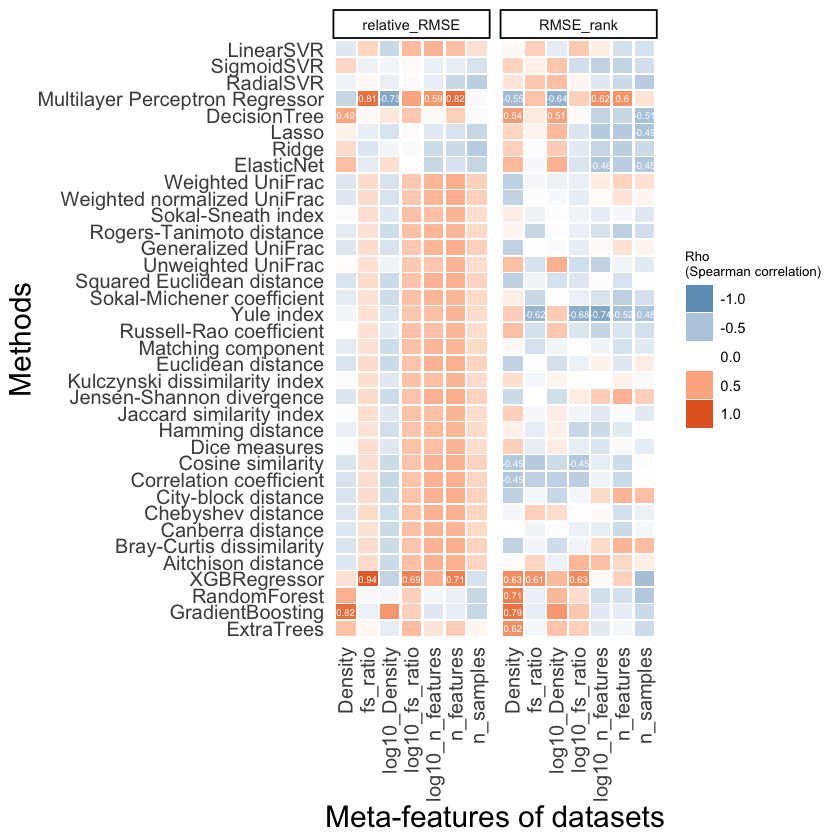

In [53]:
p_corr<-ggplot(subset(subset(data_summ_corr_m, Metric!="perc_RMSE"), Data_property!="Datasize"), aes(x=Data_property, y=NAME, z=value)) + 
  xlab("Meta-features of datasets")+ylab("Methods")+
  geom_tile(aes(fill = value, width=0.9, height=0.9), size=0.2) + #
  scale_color_manual(values=c("white","grey80"))+
  
  guides(fill=guide_legend(title="Rho \n(Spearman correlation)"))+
  geom_text(aes(label = valueIfSig), size=2, color="white") + # color="white"
  #scale_color_manual(values=c("white","grey80"))+
  #scale_fill_viridis()+ 
  facet_wrap(~Metric)+
  theme_bw() + theme_classic() +
  theme(axis.line = element_blank(), 
        axis.title = element_text(size=18),
        axis.text.x = element_text(angle = 90, vjust=0.5, hjust=1, size=12),
        axis.text.y = element_text(size=12),
        axis.ticks = element_blank(),
        legend.title=element_text(size=8))
#p_corr + scale_fill_viridis()+ scale_fill_continuous(limits=c(-1, 1), breaks=seq(-1,1, by=0.25))
p_corr<-p_corr + scale_fill_gradient2(low = "#6D9EC1", high = "#E46726", mid = "white", 
   midpoint = 0, limit = c(-1,1), space = "Lab", 
   name="Spearman\nCorrelation") 
p_corr
ggsave(filename=paste(outpath, "corr_heatmap2.ggplot.pdf",sep=""),plot=p_corr, height=6, width=9)
# colors = c("#6D9EC1", "white", "#E46726")

### Datatype: statistical analysis still needed

In [48]:
#install.packages("ggnewscale", repos='http://cran.rstudio.com/')
library("tidyverse")
library("ggplot2")
library("ggnewscale")

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ tibble  1.4.2     ✔ purrr   0.2.5
✔ tidyr   0.8.1     ✔ stringr 1.3.1
✔ readr   1.1.1     ✔ forcats 0.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ randomForest::combine() masks dplyr::combine()
✖ plotly::filter()        masks dplyr::filter(), stats::filter()
✖ cowplot::ggsave()       masks ggplot2::ggsave()
✖ dplyr::lag()            masks stats::lag()
✖ randomForest::margin()  masks ggplot2::margin()
✖ plotly::select()        masks MASS::select(), dplyr::select()


Warning message:
“Ignoring unknown aesthetics: x, y”

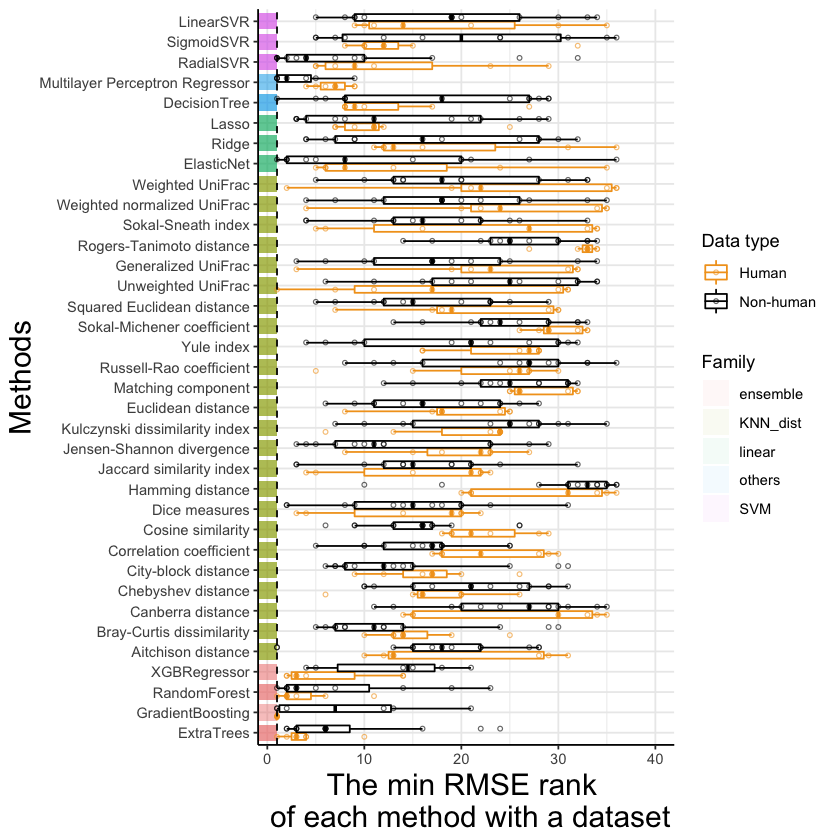

In [54]:
gg_color_hue <- function(n) {
  hues = seq(15, 375, length = n + 1)
  hcl(h = hues, l = 65, c = 100)[1:n]
}
#library("ggnewscale")
bp_min_RMSE_rank_col_by_Datatype<-ggplot(data_summ, aes(x=NAME, y=min_RMSE_rank, group=interaction(NAME, Datatype))) + #, fill=Datatype
    geom_rect(data = data_summ, aes(x=NAME, y=min_RMSE_rank, fill = Family), 
              xmin = as.numeric(data_summ$NAME) -0.4, xmax = as.numeric(data_summ$NAME)+0.4, 
              ymin = -Inf, ymax = 1, alpha = 0.05)+
    #scale_fill_manual("Family", values = gg_color_hue(5), labels = c("Ensemble", "KNN_dist", "linear", "others", "SVM")) +
    #new_scale_fill() +
    geom_boxplot(aes(color=Datatype), outlier.shape = NA) + 
    geom_point(aes(color=Datatype), pch = 21, position = position_dodge(width = 0.8), size=1,alpha=0.6)+
    scale_color_manual("Data type", values = c("#F2A11F", "black"), labels = c("Human", "Non-human")) +
    #geom_jitter(position=position_jitterdodge(jitter.width= 0.2, dodge.width = 0.8),size=1,alpha=0.6) +
    ylim(c(1, 40))+
    geom_hline(yintercept=1, linetype="dashed")+
    coord_flip()+
    ylab("The min RMSE rank \n of each method with a dataset")+ xlab("Methods")+
    
    #facet_wrap(~Datatype)+
    theme_bw()+
    theme(#axis.text.x = element_text(angle = 90, vjust=0.5, hjust = 1,size=12), aes(color=Family), 
        axis.title = element_text(size=18),
        axis.line = element_line(color="black"),
        strip.background = element_rect(colour = "white"),
        panel.border = element_blank())
bp_min_RMSE_rank_col_by_Datatype 

#ggsave(filename=paste(outpath, "min_RMSE_rank_ML_colbyFamily_datatype_facets.boxplot.pdf",sep=""),plot=bp_min_RMSE_rank_facets_by_Datatype, height=6, width=10)


Warning message:
“Ignoring unknown aesthetics: x, y”Warning message:
“Removed 25 rows containing non-finite values (stat_boxplot).”Warning message:
“Removed 25 rows containing missing values (geom_point).”

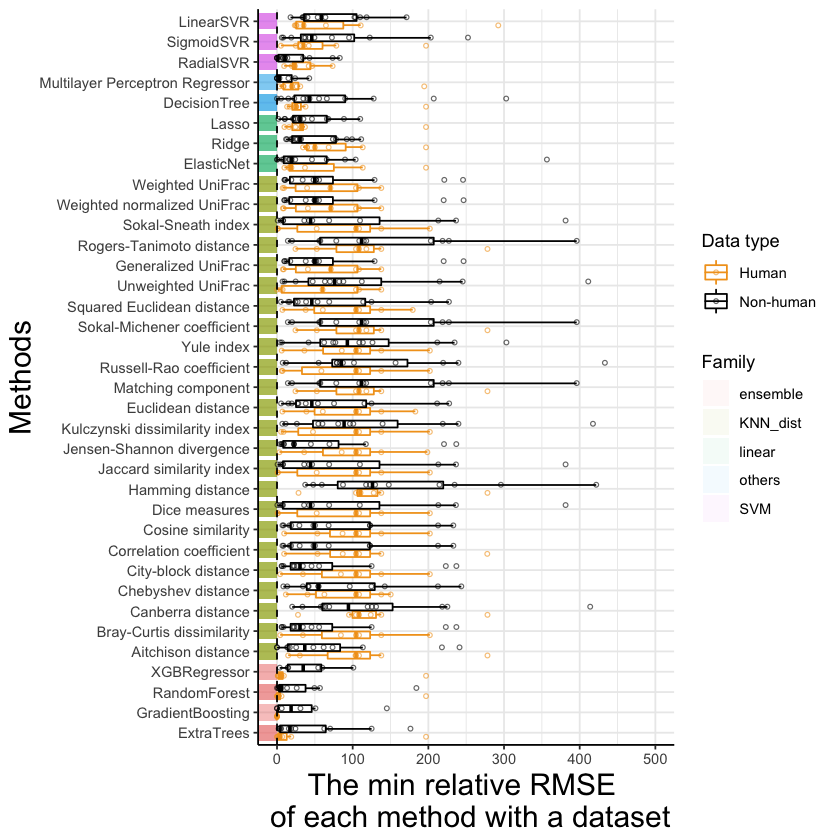

In [52]:
#library("ggnewscale")
bp_min_relative_RMSE_col_by_Datatype<-ggplot(data_summ, aes(x=NAME, y=min_relative_RMSE, group=interaction(NAME, Datatype))) + #, fill=Datatype
    geom_rect(data = data_summ, aes(x=NAME, y=min_relative_RMSE, fill = Family), 
              xmin = as.numeric(data_summ$NAME) -0.4, xmax = as.numeric(data_summ$NAME)+0.4, 
              ymin = -Inf, ymax = 0, alpha = 0.05)+
    #scale_fill_manual("Family", values = gg_color_hue(5), labels = c("Ensemble", "KNN_dist", "linear", "others", "SVM")) +
    #new_scale_fill() +
    geom_boxplot(aes(color=Datatype), outlier.shape = NA) + 
    geom_point(aes(color=Datatype), pch = 21, position = position_dodge(width = 0.8), size=1,alpha=0.6)+
    scale_color_manual("Data type", values = c("#F2A11F", "black"), labels = c("Human", "Non-human")) +
    #geom_jitter(position=position_jitterdodge(jitter.width= 0.2, dodge.width = 0.8),size=1,alpha=0.6) +
    ylim(c(0, 500))+
    geom_hline(yintercept=0, linetype="dashed")+
    coord_flip()+
    ylab("The min relative RMSE \n of each method with a dataset")+ xlab("Methods")+
    
    #facet_wrap(~Datatype)+
    theme_bw()+
    theme(#axis.text.x = element_text(angle = 90, vjust=0.5, hjust = 1,size=12), aes(color=Family), 
        axis.title = element_text(size=18),
        axis.line = element_line(color="black"),
        strip.background = element_rect(colour = "white"),
        panel.border = element_blank())
bp_min_relative_RMSE_col_by_Datatype 

#ggsave(filename=paste(outpath, "min_relative_RMSE_ML_colbyFamily_datatype_facets.boxplot.pdf",sep=""),plot=bp_min_relative_RMSE_facets_by_Datatype, height=6, width=10)


Warning message:
“Removed 25 rows containing non-finite values (stat_boxplot).”Warning message:
“Removed 25 rows containing missing values (geom_point).”

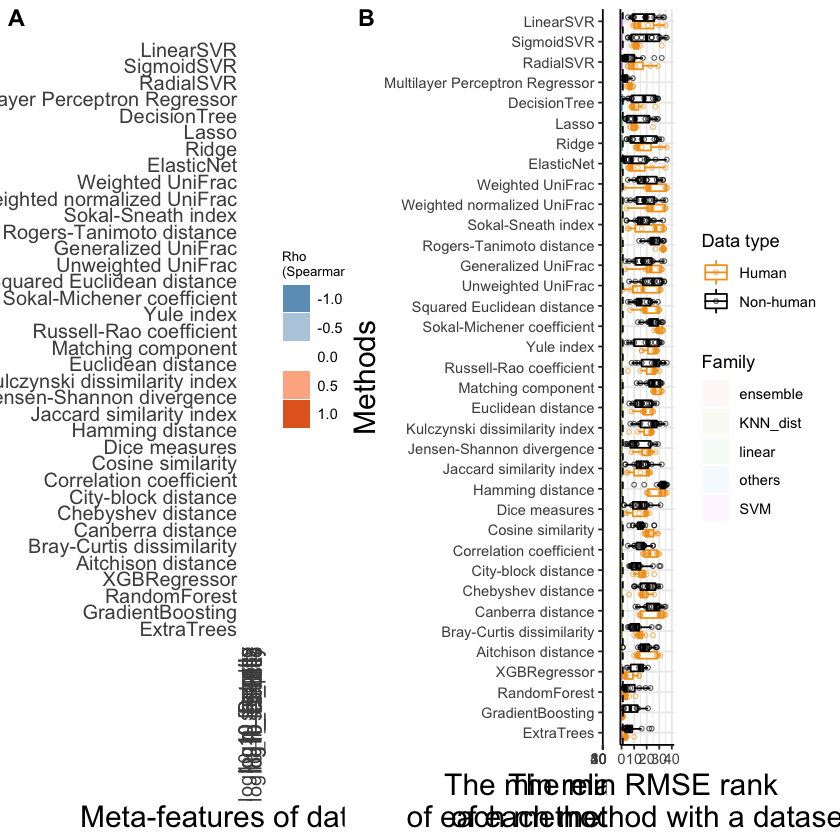

In [55]:

bp_min_relative_RMSE_col_by_Datatype_1<-bp_min_relative_RMSE_col_by_Datatype + theme(legend.position = "none")
bp_min_RMSE_rank_col_by_Datatype_1<-bp_min_RMSE_rank_col_by_Datatype+
        theme(
          axis.text.y = element_blank(),
          axis.title.y=element_blank(), 
          axis.ticks.y=element_blank())
bp2<-plot_grid(bp_min_relative_RMSE_col_by_Datatype_1, bp_min_RMSE_rank_col_by_Datatype_1, ncol=2, rel_widths = c(5.5, 5))
f2<-plot_grid(p_corr, bp2, rel_widths = c(5, 7), labels="AUTO")
f2
ggsave(filename=paste(outpath, "Figure2.pdf",sep=""),plot=f2, height=8, width=15)


## Figure S4: meta-features of datasets

In [43]:
data_features<-data_summ[!duplicated(data_summ$DATASET), c("DATASET", "Datatype", "n_samples", "n_features", "Density")]
data_features$Density<-data_features$Density/100
data_features$log10_n_features<-log10(data_features$n_features)
data_features$log10_Density<-log10(data_features$Density)

data_features


DATASET                Datatype  n_samples n_features Density     
1  82-soil                non_human   74       21203     5.889534e-04
2  cider                  non_human  170         255     4.299885e-04
3  fermentation_10119     non_human  686        1601     4.518950e-04
4  fermentation_1976_beer non_human   17         295     1.806580e-03
5  fermentation_1976_wine non_human   11         246     3.137472e-03
6  fermentation_2278      non_human  110         281     1.294403e-03
7  infant_fecal_10080     human      184        8729     5.434783e-05
8  infant_fecal_10918     human      172         731     4.637642e-04
9  infant_fecal_11358     human      106        1708     1.148259e-03
10 infant_fecal_11402     human      188        1252     5.872306e-04
11 infant_oral_2010       human      105         450     4.249735e-04
12 infant_skin_2010       human      311        2616     2.666868e-04
13 malnutrition           human      533        1164     4.061219e-04
14 PMI_16s                non_human  337        6553     2.122389e-04
15 soil_10082             non_human  221       20479     7.235312e-04
16 soil_10442             non_human  629       55105     1.644685e-04
17 soil_10764             non_human  266         142     4.648946e-04
18 soil_1883              non_human  520       19385     1.991677e-04
19 soil_2104              non_human 1160      114050     2.519258e-04
20 soil_945               non_human 1041       24753     9.533810e-05
   log10_n_features log10_Density
1  4.326397         -3.229919    
2  2.406540         -3.366543    
3  3.204391         -3.344962    
4  2.469822         -2.743143    
5  2.390935         -2.503420    
6  2.448706         -2.887930    
7  3.940964         -4.264818    
8  2.863917         -3.333703    
9  3.232488         -2.939960    
10 3.097604         -3.231191    
11 2.653213         -3.371638    
12 3.417638         -3.573998    
13 3.065953         -3.391344    
14 3.816440         -3.673175    
15 4.311309         -3.140543    
16 4.741191         -3.783917    
17 2.152288         -3.332645    
18 4.287466         -3.700781    
19 5.057095         -3.598727    
20 4.393628         -4.020734

Using DATASET, Datatype as id variables


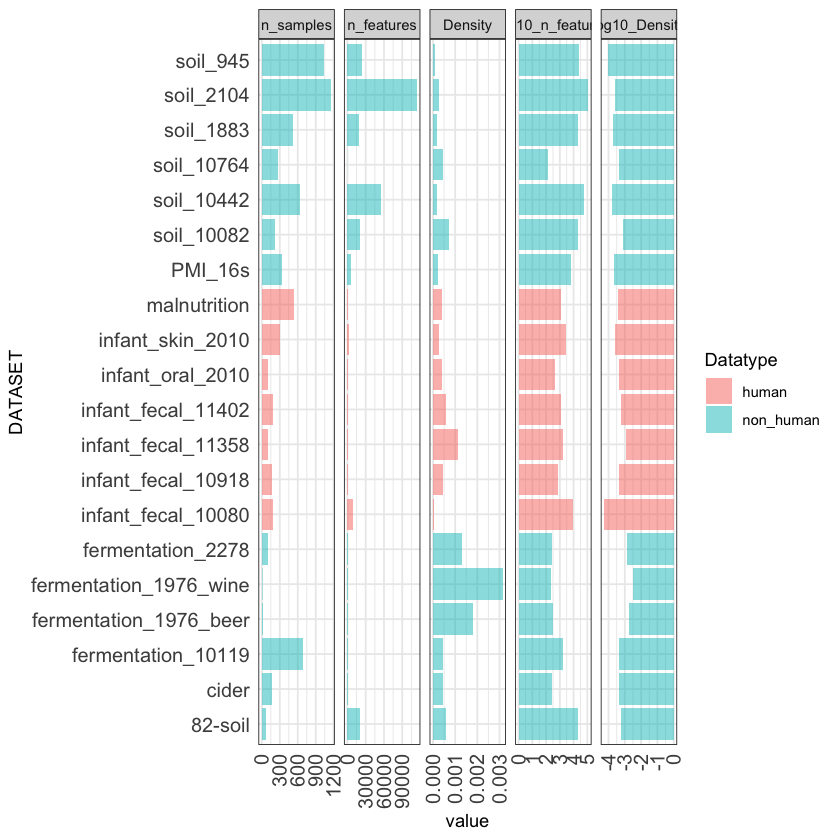

In [44]:

data_features_m<-melt(data_features)
p_data_features<-ggplot(data_features_m, aes(x=DATASET, y=value)) +  #subset(data_features_m, variable!="n_features")
geom_bar(aes(fill=Datatype), stat="identity", alpha=0.5) + 
coord_flip()+
facet_wrap(~variable, scale="free_x", nrow=1)+
  theme_bw() + #theme_classic() +
  theme(axis.line = element_blank(), 
        axis.text.x = element_text(angle = 90, vjust=0.5, hjust=1, size=12),
        axis.text.y = element_text(size=12),
        axis.ticks = element_blank())
p_data_features
ggsave(filename=paste(outpath, "FigureS3_data_features.pdf",sep=""),plot=p_data_features, height=6, width=12)

## Figure 3
## RUNTIME VS best_relative_RMSE, paramspace

Warning message:
“Removed 25 rows containing missing values (geom_point).”

Warning message:
“Removed 25 rows containing missing values (geom_point).”

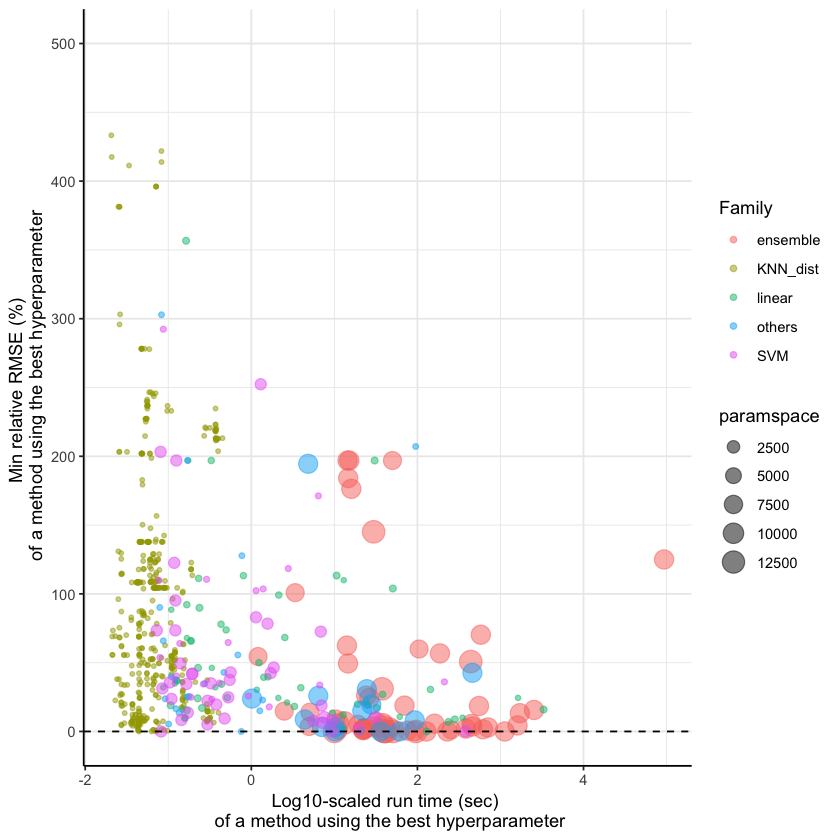

In [58]:
p_min_relative_RMSE_VS_RUNTIME<-ggplot(data_summ, aes(x=log10(RUNTIME4min_relative_RMSE), y=min_relative_RMSE)) +
    geom_point(aes(color=Family, size=paramspace), alpha=0.5)+
    ylab("Min relative RMSE (%) \n of a method using the best hyperparameter" )+
    xlab("Log10-scaled run time (sec) \n of a method using the best hyperparameter")+
    #geom_errorbarh(aes(xmin=log10_mean_RUNTIME-log10_sd_RUNTIME, xmax=log10_mean_RUNTIME+log10_sd_RUNTIME), width=.1, alpha=0.1) +
    #geom_errorbar(aes(ymin=mean_perc_RMSE-sd_perc_RMSE, ymax=mean_perc_RMSE+sd_perc_RMSE), width=.1, alpha=0.1) +
    geom_hline(yintercept=0, linetype="dashed")+
    ylim(c(0, 500))+
    theme_bw()+
    theme(axis.line = element_line(color="black"),
        strip.background = element_rect(colour = "white"),
        panel.border = element_blank())
p_min_relative_RMSE_VS_RUNTIME
ggsave(filename=paste(outpath, "min_relative_RMSE_0-500_VS_runtime.colbyfamily.param.noerrorbars.ggplot.pdf",sep=""),plot=p_min_relative_RMSE_VS_RUNTIME, height=6, width=8)


In [59]:
p_min_relative_RMSE_VS_RUNTIME_1<-p_min_relative_RMSE_VS_RUNTIME + 
            theme(axis.text.x = element_blank(),
          axis.title.x=element_blank(), 
          axis.ticks.x=element_blank(),
          axis.text.y = element_blank(),
          axis.title.y=element_blank(), 
          axis.ticks.y=element_blank(), 
          legend.position="none"
      )
require("grid")
legend <- cowplot::get_legend(p_min_relative_RMSE_VS_RUNTIME)


Loading required package: grid
Warning message:
“Removed 25 rows containing missing values (geom_point).”

In [65]:
bp_min_relative_RMSE<-ggplot(data_summ, aes(x=Family, y=min_relative_RMSE)) +
    geom_boxplot( outlier.shape = NA) + 
    geom_jitter(aes(color=Family), position=position_jitterdodge(jitter.width= 0.2,dodge.width = 0.8),size=1,alpha=0.4) +
    ylab("The min relative RMSE (%) \n of a method")+ #xlab("Mean log10-scaled run time (sec)")+
    #coord_flip()+
    geom_hline(yintercept=0, linetype="dashed")+
    ylim(c(0, 500))+
    theme_bw()+
    theme(axis.text.x = element_blank(),
          axis.title.y= element_text(size=18),
          axis.title.x=element_blank(), 
          axis.ticks.x=element_blank(),
        axis.line = element_line(color="black"),
        strip.background = element_rect(colour = "white"),
        panel.border = element_blank())+
theme(legend.position="none")


In [66]:
bp_RUNTIME<-ggplot(data_summ, aes(x=Family, y=log10(RUNTIME4min_relative_RMSE))) +
    geom_boxplot( outlier.shape = NA) + 
    geom_jitter(aes(color=Family), position=position_jitterdodge(jitter.width= 0.2,dodge.width = 0.8),size=1,alpha=0.4) +
    ylab("Log10-scaled run time (sec) \n of the best model")+
    coord_flip()+
    theme_bw()+
    theme(axis.text.y = element_blank(),
          axis.title.x= element_text(size=18),
          axis.title.y=element_blank(), 
          axis.ticks.y=element_blank(),
        axis.line = element_line(color="black"),
        strip.background = element_rect(colour = "white"),
        panel.border = element_blank())+
theme(legend.position="none")


Warning message:
“Removed 25 rows containing non-finite values (stat_boxplot).”Warning message:
“Removed 25 rows containing missing values (geom_point).”Warning message:
“Removed 25 rows containing missing values (geom_point).”

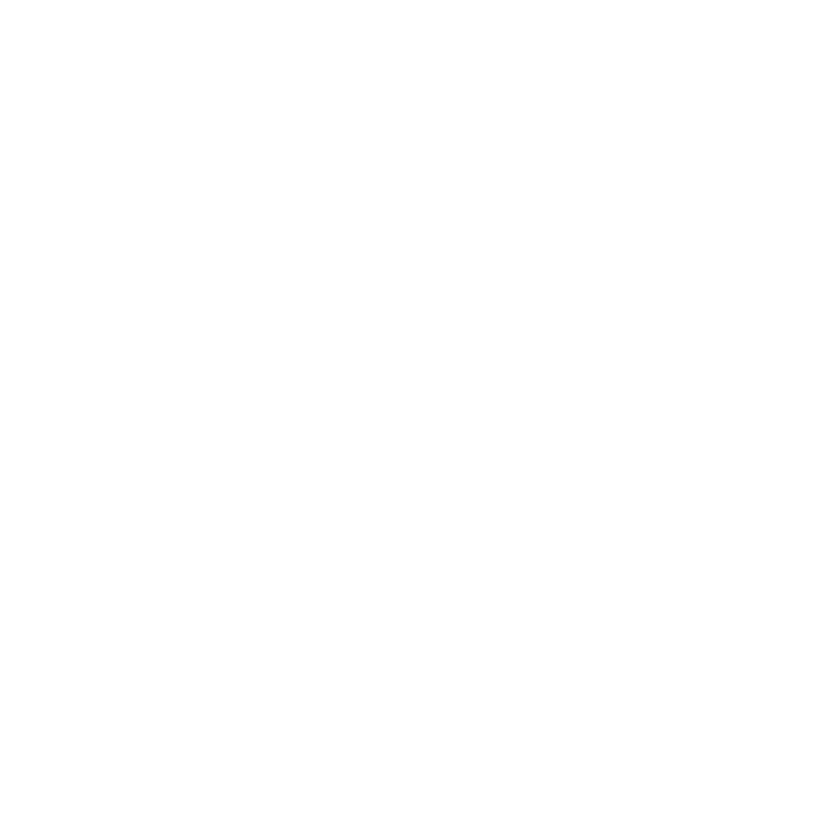

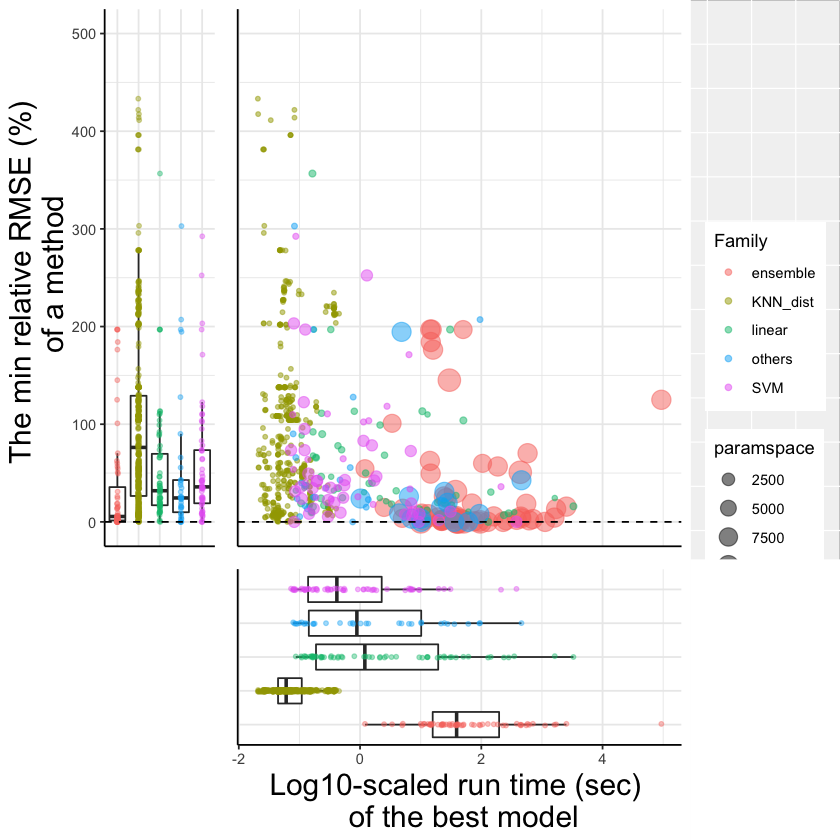

In [67]:
require('gridExtra')
library('grid')
blank <- grid.rect(gp=gpar(col="white"))
p<-arrangeGrob(bp_min_relative_RMSE, p_min_relative_RMSE_VS_RUNTIME_1, plot_grid(NULL, legend, ncol=1), blank, bp_RUNTIME, blank, 
               ncol = 3, nrow = 2, widths=c(1.2, 2.5, 0.8), heights=c(2.8, 1.4))
plot(p)
ggsave(filename=paste(outpath,"Figure3_min_relative_RMSE_0-500_VS_runtime.colbyfamily.params.noerrorbars.combined.ggplot.pdf",sep=""),
       p, width=9, height=6)

## Figure S6
## RMSE VS Run time

## To split the data by NAME alone:

In [45]:
require('dplyr')
data_summ_ML<-data %>% group_by(NAME) %>% 
            summarise(Family=unique(Family), paramspace=unique(SIZE_PARAM_SPACE), 
                      mean_RUNTIME=mean(RUNTIME, na.rm=TRUE), median_RUNTIME=median(RUNTIME, na.rm=TRUE), sd_RUNTIME=sd(RUNTIME, na.rm=TRUE), 
                      mean_relative_RMSE=mean(relative_RMSE, na.rm=TRUE), median_relative_RMSE=median(relative_RMSE, na.rm=TRUE), sd_relative_RMSE=sd(relative_RMSE, na.rm=TRUE),
                      mean_perc_RMSE=mean(X.RMSE, na.rm=TRUE), median_perc_RMSE=median(X.RMSE, na.rm=TRUE), sd_perc_RMSE=sd(X.RMSE, na.rm=TRUE),
                      min_perc_RMSE=min(X.RMSE, na.rm=TRUE), min_relative_RMSE=min(relative_RMSE, na.rm=TRUE),
                      p_perc_RMSE_corr_Density=cor.test(X.RMSE, Density)$p.value,
                      p_perc_RMSE_corr_Datasize=cor.test(X.RMSE, Datasize)$p.value,
                      logp_perc_RMSE_corr_Density=-log(cor.test(X.RMSE, Density)$p.value, 10),
                      logp_perc_RMSE_corr_Datasize=-log(cor.test(X.RMSE, Datasize)$p.value, 10),
                      corr_perc_RMSE_Density=cor.test(X.RMSE, Density)$estimate,
                      corr_perc_RMSE_Datasize=cor.test(X.RMSE, Datasize)$estimate,
                      p_relative_RMSE_corr_Density=cor.test(relative_RMSE, Density)$p.value,
                      p_relative_RMSE_corr_Datasize=cor.test(relative_RMSE, Datasize)$p.value,
                      p_relative_RMSE_corr_n_samples=cor.test(relative_RMSE, n_samples)$p.value,
                      p_relative_RMSE_corr_n_features=cor.test(relative_RMSE, n_features)$p.value,
                      logp_relative_RMSE_corr_Density=-log(cor.test(relative_RMSE, Density)$p.value, 10),
                      logp_relative_RMSE_corr_Datasize=-log(cor.test(relative_RMSE, Datasize)$p.value, 10),
                      logp_relative_RMSE_corr_n_samples=-log(cor.test(relative_RMSE, n_samples)$p.value, 10),
                      logp_relative_RMSE_corr_n_features=-log(cor.test(relative_RMSE, n_features)$p.value, 10),
                      corr_relative_RMSE_Density=cor.test(relative_RMSE, Density)$estimate,
                      corr_relative_RMSE_Datasize=cor.test(relative_RMSE, Datasize)$estimate,
                      corr_relative_RMSE_corr_n_samples=cor.test(relative_RMSE, n_samples)$estimate,
                      corr_relative_RMSE_corr_n_features=cor.test(relative_RMSE, n_features)$estimate
                      )
head(data_summ_ML)


NAME                      Family   paramspace mean_RUNTIME median_RUNTIME
1 Aitchison distance        KNN_dist 20         0.09935553   0.05839916    
2 Bray-Curtis dissimilarity KNN_dist 20         0.09561165   0.05705706    
3 Canberra distance         KNN_dist 20         0.09557377   0.05922020    
4 Chebyshev distance        KNN_dist 20         0.09899377   0.06658948    
5 City-block distance       KNN_dist 20         0.09567747   0.05707413    
6 Correlation coefficient   KNN_dist 20         0.09993956   0.06240723    
  sd_RUNTIME mean_relative_RMSE median_relative_RMSE sd_relative_RMSE
1 0.10162779 190.1634           104.38994            337.2189        
2 0.09952428 178.8602            88.75618            337.6990        
3 0.09943732 241.6016           130.37924            336.0271        
4 0.10082068 185.7688           102.89805            335.3100        
5 0.09908117 178.8602            88.75618            337.6990        
6 0.10006260 186.6044           104.38994            336.3483        
  mean_perc_RMSE ⋯ p_relative_RMSE_corr_n_samples
1 105.7036       ⋯ 9.411166e-06                  
2 102.3777       ⋯ 2.264150e-06                  
3 119.5655       ⋯ 1.081945e-06                  
4 104.1705       ⋯ 1.596336e-06                  
5 102.3777       ⋯ 2.264150e-06                  
6 104.8584       ⋯ 4.778249e-06                  
  p_relative_RMSE_corr_n_features logp_relative_RMSE_corr_Density
1 7.909188e-21                    2.744752                       
2 2.263443e-21                    3.580558                       
3 2.797743e-24                    2.027369                       
4 1.559091e-21                    3.545359                       
5 2.263443e-21                    3.580558                       
6 4.180276e-20                    4.202359                       
  logp_relative_RMSE_corr_Datasize logp_relative_RMSE_corr_n_samples
1  7.989307                        5.026357                         
2  8.272003                        5.645095                         
3 10.896920                        5.965795                         
4  8.213612                        5.796876                         
5  8.272003                        5.645095                         
6  7.499801                        5.320731                         
  logp_relative_RMSE_corr_n_features corr_relative_RMSE_Density
1 20.10187                           -0.1556056                
2 20.64523                           -0.1815278                
3 23.55319                           -0.1297340                
4 20.80713                           -0.1805067                
5 20.64523                           -0.1815278                
6 19.37880                           -0.1987329                
  corr_relative_RMSE_Datasize corr_relative_RMSE_corr_n_samples
1 0.2814019                   0.2194938                        
2 0.2865570                   0.2338603                        
3 0.3301076                   0.2409584                        
4 0.2855008                   0.2372474                        
5 0.2865570                   0.2338603                        
6 0.2722174                   0.2264457                        
  corr_relative_RMSE_corr_n_features
1 0.4447826                         
2 0.4503448                         
3 0.4784954                         
4 0.4519826                         
5 0.4503448                         
6 0.4372185

In [46]:
#res <- data %>% group_by(NAME) %>% 
#     summarise(p = wilcox.test(relative_RMSE~Datatype, data=., paired=FALSE)$p.value, 
#              w = wilcox.test(relative_RMSE~Datatype, data=., paired=FALSE)$estimate)
# res

### order the NAME by family

In [47]:
NMAE_byfamily=unique(data_summ_ML$NAME[order(data_summ_ML$Family)])
NMAE_byfamily
data_summ_ML$NAME=factor(data_summ_ML$NAME, levels=NMAE_byfamily, order=TRUE)

[1] ExtraTrees                      GradientBoosting               
 [3] RandomForest                    XGBRegressor                   
 [5] Aitchison distance              Bray-Curtis dissimilarity      
 [7] Canberra distance               Chebyshev distance             
 [9] City-block distance             Correlation coefficient        
[11] Cosine similarity               Dice measures                  
[13] Euclidean distance              Generalized UniFrac            
[15] Hamming distance                Jaccard similarity index       
[17] Jensen-Shannon divergence       Kulczynski dissimilarity index 
[19] Matching component              Rogers-Tanimoto distance       
[21] Russell-Rao coefficient         Sokal-Michener coefficient     
[23] Sokal-Sneath index              Squared Euclidean distance     
[25] Unweighted UniFrac              Weighted normalized UniFrac    
[27] Weighted UniFrac                Yule index                     
[29] ElasticNet                      Lasso                          
[31] Ridge                           DecisionTree                   
[33] Multilayer Perceptron Regressor LinearSVR                      
[35] RadialSVR                       SigmoidSVR                     
36 Levels: Aitchison distance Bray-Curtis dissimilarity ... Yule index

## Figure S6
## RMSE VS Run time

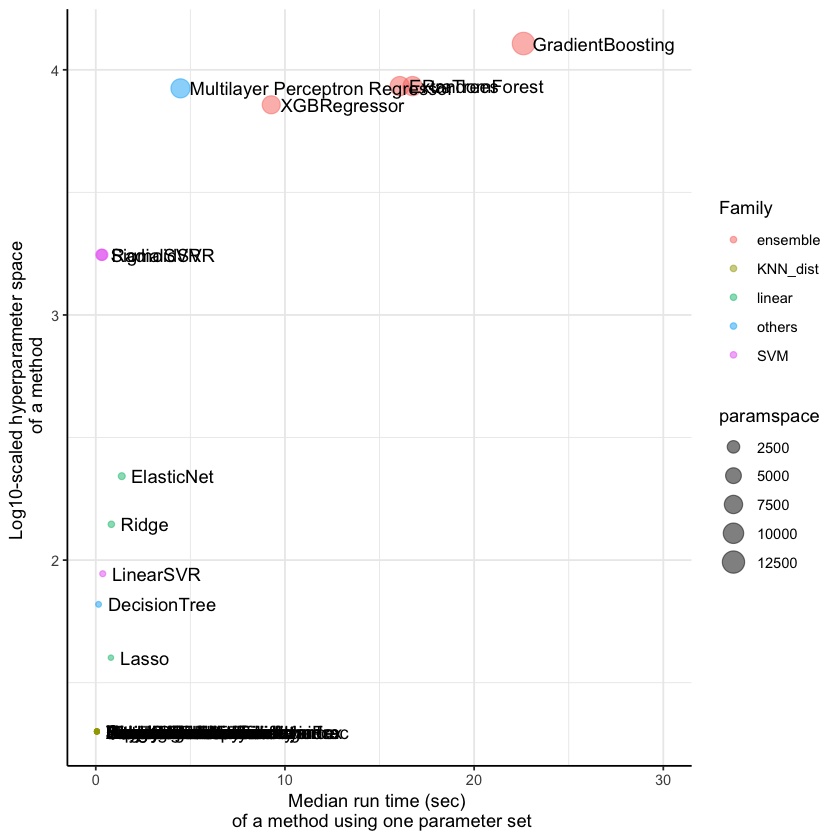

In [460]:
p_run_time_VS_paramspace<-ggplot(data_summ_ML, aes(x=median_RUNTIME, y=log10(paramspace))) +
    ylab("Log10-scaled hyperparameter space \n of a method")+
    xlab("Median run time (sec) \n of a method using one parameter set")+
    geom_point(aes(color=Family, size=paramspace), alpha=0.5)+
    xlim(c(0, 30))+
    geom_text(aes(label=NAME), hjust = 0, nudge_x = 0.5)+
    #geom_text(data=subset(data_summ_ML, Family=="ensemble"), aes(label=NAME), hjust = 0, nudge_x = 0.5)+
    theme_bw()+
    theme(
        axis.line = element_line(color="black"),
        strip.background = element_rect(colour = "white"),
        panel.border = element_blank())
p_run_time_VS_paramspace

### median RMSE

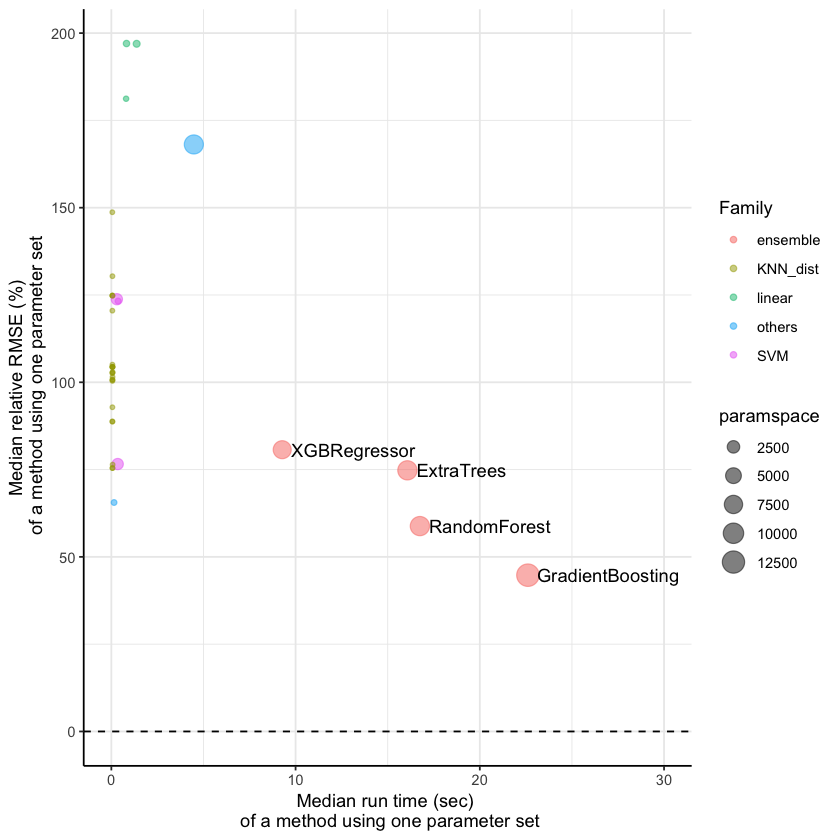

In [461]:
p_median_relative_RMSE<-ggplot(data_summ_ML, aes(x=median_RUNTIME, y=median_relative_RMSE)) +
    ylab("Median relative RMSE (%)\n of a method using one parameter set")+
    xlab("Median run time (sec) \n of a method using one parameter set")+
    geom_point(aes(color=Family, size=paramspace), alpha=0.5)+
    geom_text(data=subset(data_summ_ML, Family=="ensemble"), aes(label=NAME), hjust = 0, nudge_x = 0.5)+
    geom_hline(yintercept=0, linetype="dashed")+
    xlim(c(0, 30))+
    theme_bw()+
    theme(
        axis.line = element_line(color="black"),
        strip.background = element_rect(colour = "white"),
        panel.border = element_blank())
p_median_relative_RMSE


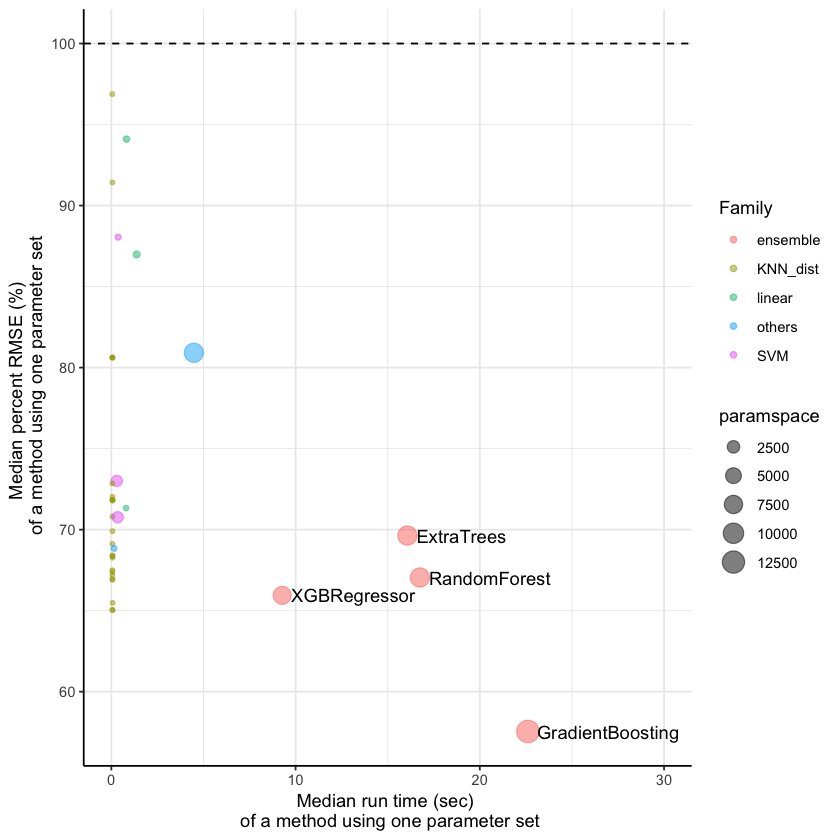

In [462]:
p_median_perc_RMSE<-ggplot(data_summ_ML, aes(x=median_RUNTIME, y=median_perc_RMSE)) +
    ylab("Median percent RMSE (%) \n of a method using one parameter set")+
    xlab("Median run time (sec) \n of a method using one parameter set")+
    xlim(c(0, 30))+
    geom_point(aes(color=Family, size=paramspace), alpha=0.5)+
    geom_text(data=subset(data_summ_ML, Family=="ensemble"), aes(label=NAME), hjust = 0, nudge_x = 0.5)+
    geom_hline(yintercept=100, linetype="dashed")+
    theme_bw()+
    theme(
        axis.line = element_line(color="black"),
        strip.background = element_rect(colour = "white"),
        panel.border = element_blank())
p_median_perc_RMSE


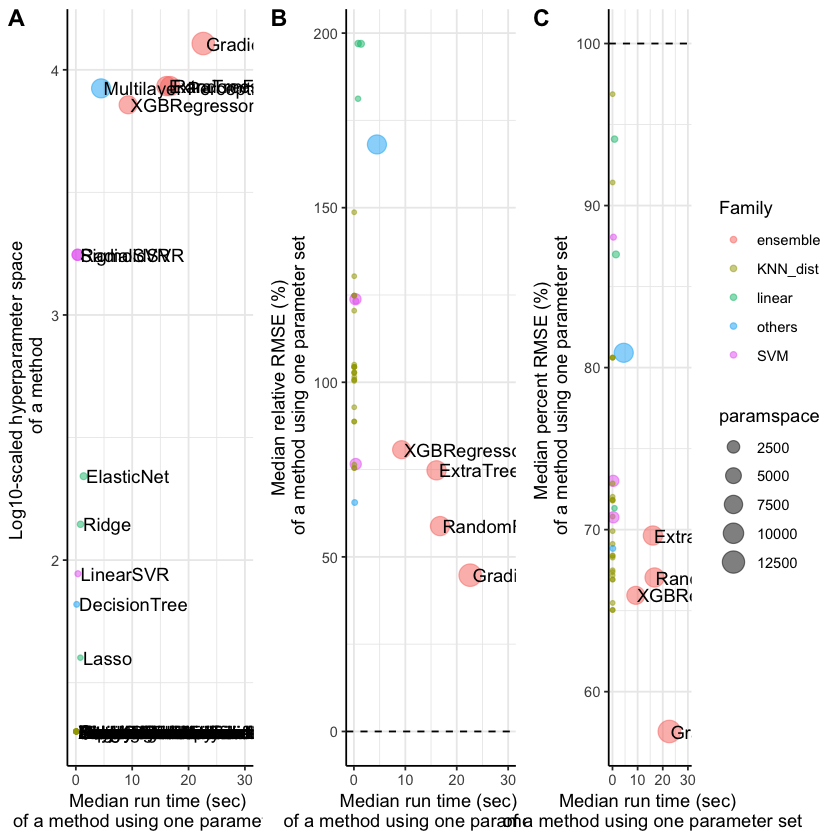

In [482]:
p_median_relative_RMSE_1 <- p_median_relative_RMSE + theme(legend.position="none")
p_run_time_VS_paramspace_1<- p_run_time_VS_paramspace + theme(legend.position="none")

median_RMSE_runtime_plot<-plot_grid(p_run_time_VS_paramspace_1, p_median_relative_RMSE_1, p_median_perc_RMSE, ncol=3, nrow=1, rel_widths = c(5, 5, 6), labels=c("A", "B", "C"))
median_RMSE_runtime_plot
ggsave(filename=paste(outpath, "FigureS6_median_RMSE_VS_runtime_colbyfamily.barplot.pdf",sep=""),plot=median_RMSE_runtime_plot, height=4, width=14)


In [65]:
sessionInfo()

R version 3.5.1 (2018-07-02)
Platform: x86_64-apple-darwin13.4.0 (64-bit)
Running under: macOS  10.14.5

Matrix products: default
BLAS/LAPACK: /Users/huangshi/anaconda3/envs/r-env-ggplot2/lib/R/lib/libRblas.dylib

locale:
[1] en_US.UTF-8/en_US.UTF-8/en_US.UTF-8/C/en_US.UTF-8/en_US.UTF-8

attached base packages:
[1] grid      stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
 [1] gridExtra_2.3       ggnewscale_0.2.0    forcats_0.3.0      
 [4] stringr_1.3.1       purrr_0.2.5         readr_1.1.1        
 [7] tidyr_0.8.1         tibble_1.4.2        tidyverse_1.2.1    
[10] viridis_0.5.1       viridisLite_0.3.0   bindrcpp_0.2.2     
[13] corrplot_0.84       pROC_1.14.0         cowplot_0.9.4      
[16] plotly_4.9.0        cluster_2.0.7-1     randomForest_4.6-14
[19] dplyr_0.7.6         pheatmap_1.0.12     ggplot2_3.1.1      
[22] reshape2_1.4.3      ade4_1.7-13         vegan_2.5-5        
[25] lattice_0.20-35     permute_0.9-5      

loaded 